In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from datetime import datetime
from scipy.stats import fisher_exact
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

Download and format data

In [2]:
df2019_1 = pd.read_excel('2019_docketx.xlsx', sheet_name='Proceedings')
df2019_2 = pd.read_excel('2019_dockety.xlsx', sheet_name='Proceedings')
df2020 = pd.read_excel('2020_docketx.xlsx', sheet_name='Proceedings')
df2021 = pd.read_excel('2021_docketx.xlsx', sheet_name= "Proceedings")
df2022 = pd.read_excel('2022_docketx.xlsx', sheet_name='Proceedings')

In [3]:
df2023 = pd.read_excel('2023_docketx.xlsx', sheet_name= "Proceedings")
df2024 = pd.read_excel('2024_docketx.xlsx', sheet_name= "Proceedings")

dataframe701 = pd.concat([df2019_1, df2019_2, df2020, df2021, df2022, df2023, df2024])

In [4]:
df2019info_1 = pd.read_excel('2019_docketx.xlsx', sheet_name='Defendant')
df2019info_2 = pd.read_excel('2019_dockety.xlsx', sheet_name='Defendant')
df2020info = pd.read_excel('2020_docketx.xlsx', sheet_name='Defendant')
df2021info = pd.read_excel('2021_docketx.xlsx', sheet_name= "Defendant")
df2022info = pd.read_excel('2022_docketx.xlsx', sheet_name='Defendant')
df2023info = pd.read_excel('2023_docketx.xlsx', sheet_name='Defendant')
df2024info = pd.read_excel('2024_docketx.xlsx', sheet_name='Defendant')

In [5]:
df2019cdc_1 = pd.read_excel('2019_docketx.xlsx', sheet_name='CDCProceedings')
df2019cdc_2 = pd.read_excel('2019_dockety.xlsx', sheet_name='CDCProceedings')
df2020cdc = pd.read_excel('2020_docketx.xlsx', sheet_name='CDCProceedings')
df2021cdc = pd.read_excel('2021_docketx.xlsx', sheet_name= "CDCProceedings")
df2022cdc = pd.read_excel('2022_docketx.xlsx', sheet_name='CDCProceedings')

In [6]:
df2020charge = pd.read_excel('2020_docketx.xlsx', sheet_name='Charges')
df2021charge = pd.read_excel('2021_docketx.xlsx', sheet_name= "Charges")
df2022charge = pd.read_excel('2022_docketx.xlsx', sheet_name='Charges')
df2019charge_1 = pd.read_excel('2019_docketx.xlsx', sheet_name='Charges')
df2019charge_2 = pd.read_excel('2019_dockety.xlsx', sheet_name='Charges')

In [7]:
dataframe = pd.concat([df2019_1, df2019_2, df2020, df2021, df2022 ])
dfcdc = pd.concat([ df2019cdc_1, df2019cdc_2, df2020cdc, df2021cdc, df2022cdc])
dfcharge = pd.concat([df2019charge_1, df2019charge_2, df2020charge, df2021charge, df2022charge ])
dfinfo = pd.concat([df2019info_1, df2019info_2,df2020info, df2021info, df2022info])
dfinfo701 = pd.concat([df2019info_1, df2019info_2,df2020info, df2021info, df2022info, df2023info, df2024info])

Proceeing Data from cases where the first proceeding beginnings from 01/01/2019-12/31/2022


In [8]:
dataframe['Proceeding Date'] = pd.to_datetime(dataframe['Proceeding Date'], errors='coerce')
dfcdc['Proceeding Date'] = pd.to_datetime(dfcdc['Proceeding Date'], errors='coerce')
dataframe = dataframe[dataframe["Proceeding Date"] > pd.Timestamp("2018-12-31")]
dfcdc = dfcdc[dfcdc["Proceeding Date"] > pd.Timestamp("2018-12-31")]

In [9]:
dfinfo = dfinfo.dropna()
dfinfoage =  dfinfo.merge(dataframe, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
dfinfoage["Proceeding Date"] = pd.to_datetime(dfinfoage["Proceeding Date"])
dfinfoage["Proceeding Year"] = dfinfoage["Proceeding Date"].dt.year
dfinfoage["Age"] = dfinfoage["Proceeding Year"] - dfinfoage["Birth Year"]
dfinfoage = dfinfoage.drop_duplicates(subset=['Magistrate Number'], keep='first')
dfinfoage = dfinfoage[["Magistrate Number", "Age"]]

In [10]:
pd.options.mode.chained_assignment = None
casedfpro= dataframe[["Magistrate Number", "Proceeding Text", "Proceeding Date"]]
casedfpro["Court"] = "Magistrate"
casedfcdc= dfcdc[["Magistrate Number", "Proceeding Text", "Proceeding Date"]]
casedfcdc["Court"] = "CDC"
casedfcdc = casedfcdc.rename(columns={'Proceeding Text': 'Text'})
casedfpro = casedfpro.rename(columns={'Proceeding Text': 'Text'})
casedfcdc = casedfcdc.sort_values(by=['Magistrate Number', "Proceeding Date"], ascending = [True, True])
casedfpro = casedfpro.sort_values(by=['Magistrate Number', "Proceeding Date"], ascending = [True, True])

slcasedf1 = casedfpro.groupby('Magistrate Number').apply(lambda x: x.iloc[:-1]).reset_index(drop=True)
slcasedf2 = casedfcdc.groupby('Magistrate Number').apply(lambda x: x.iloc[:-1]).reset_index(drop=True)
slcasedf = pd.concat([slcasedf1, slcasedf2])
slcasedf = slcasedf.dropna()
slcasedf = slcasedf.sort_values(by=['Magistrate Number', "Proceeding Date"], ascending = [True, True])
slcasedf = slcasedf.drop_duplicates(subset=['Magistrate Number'], keep='last')

tlcasedf1 = casedfpro.groupby('Magistrate Number').apply(lambda x: x.iloc[:-2]).reset_index(drop=True)
tlcasedf2 = casedfcdc.groupby('Magistrate Number').apply(lambda x: x.iloc[:-2]).reset_index(drop=True)
tlcasedf = pd.concat([tlcasedf1, tlcasedf2])
tlcasedf = tlcasedf.dropna()
tlcasedf = tlcasedf.sort_values(by=['Magistrate Number', "Proceeding Date"], ascending = [True, True])
tlcasedf = tlcasedf.drop_duplicates(subset=['Magistrate Number'], keep='last')

casedfpro = casedfpro.drop_duplicates(subset=['Magistrate Number'], keep='last')
casedfcdc = casedfcdc.drop_duplicates(subset=['Magistrate Number'], keep='last')
casedf = pd.concat([casedfcdc, casedfpro])
casedf = casedf.dropna()
casedf = casedf.sort_values(by=['Magistrate Number', "Proceeding Date"], ascending = [True, True])
casedf = casedf.drop_duplicates(subset=['Magistrate Number'], keep='last')

In [11]:
print("Number of cases: " + str(len(casedf)))

Number of cases: 24326


###Exploratory Analysis

In [12]:
makeupdf = casedf.merge(dfinfo, on="Magistrate Number", how='inner')
makeupdf = makeupdf.drop_duplicates(subset=['Magistrate Number'], keep='first')
totalval = len(makeupdf["Magistrate Number"].unique())
blackdf = makeupdf[makeupdf["Race"] == "Black"]
lenblack = len(blackdf)
print("Out of " + str(totalval) + " cases with defendant information " + str(lenblack) + " of the defendants are black")
whitedf = makeupdf[makeupdf["Race"] == "White"]
lenwhite = len(whitedf)
print("Out of " + str(totalval) + " cases with defendant information " + str(lenwhite) + " of the defendants are white")

Out of 15165 cases with defendant information 11650 of the defendants are black
Out of 15165 cases with defendant information 3138 of the defendants are white


In [13]:
makeupdf = makeupdf.merge(dfinfoage, on=["Magistrate Number"], how='left')
makeupdf = makeupdf.fillna(0)

In [14]:
race = makeupdf["Race"].value_counts().reset_index()
race.columns = ['Race', 'count']
race
custom_colors = ['#377e53', '#5fcf8b', '#a2f2c2', '#d8ffe7', '#d2f2de', '#fbfffd']
fig = px.pie(race,
             values='count',
             names='Race',
             title = 'Cases by Race',
             color_discrete_sequence=custom_colors)

fig.show()

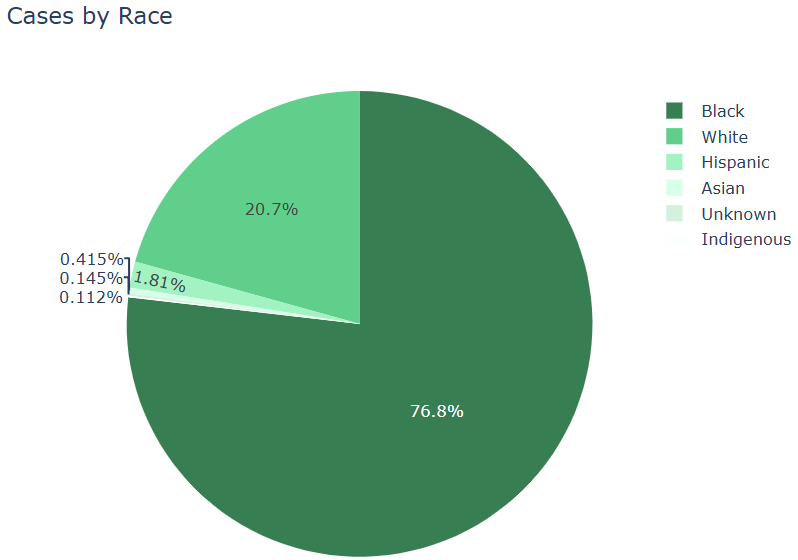

In [15]:
makeup1 = makeupdf[makeupdf["Sex"]== "Female"]
makeup1
racefem = makeup1["Race"].value_counts().reset_index()
racefem  = racefem[(racefem["Race"] == "Black")|
                   (racefem["Race"] == "White" )]
racefem
racefem.columns = ['Race', 'count']
custom_colors =  ['#88348b', '#b895dd']
fig = px.pie(racefem,
             values='count',
             names='Race',
             title = 'Female Defendants by Race',
             color_discrete_sequence=custom_colors)

fig.show()

In [16]:
sex = makeupdf["Sex"].value_counts().reset_index()
sex.columns = ['Sex', 'count']
custom_colors = ['#88348b', '#b895dd']

fig = px.pie(sex,
             values='count',
             names='Sex',
             title = 'Cases by Sex',
             color_discrete_sequence=custom_colors)

fig.show()

Text(0.5, 1.0, 'Distribution of Age of Defendants ')

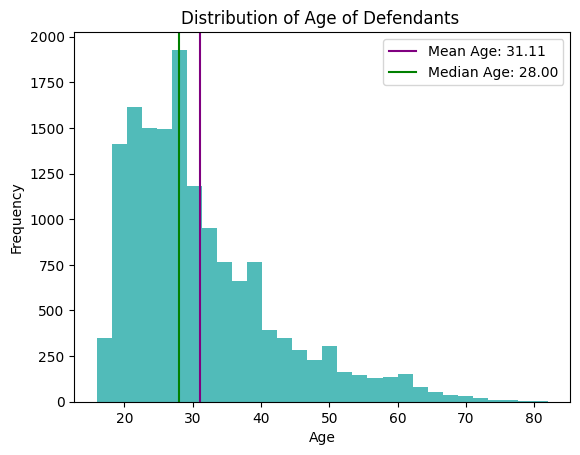

In [17]:
makeupage = makeupdf["Age"]
age = makeupage
avdays =age.mean()
mediandays =age.median()
labelmean = f"Mean Age: {avdays:.2f}"
labelmedian = f"Median Age: {mediandays:.2f}"

plt.hist(age, bins=30, color = ['#51bbb9'])
plt.axvline(x= avdays, c='purple', label=labelmean)
plt.axvline(x= mediandays, c='g',label = labelmedian)
plt.legend()

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Age of Defendants ")

In [18]:
totalval = len(makeupage)
overfifty = makeupage[makeupage  > 50]
ofifty = len(overfifty)
print("Number of defendants over 50 years old " + str(ofifty))
perfifty = (ofifty/totalval) *100
print(f"Out of {totalval} at {perfifty:.2f}%")
underthirty = makeupage[makeupage < 30 ]
uthirty = len(underthirty)
print("Number of defendants under 30 years old " + str(uthirty))
perthirty = (uthirty/totalval) *100
print(f"Out of {totalval} at {perthirty:.2f}%")

Number of defendants over 50 years old 1077
Out of 15165 at 7.10%
Number of defendants under 30 years old 8295
Out of 15165 at 54.70%


In [19]:
bmale = makeupdf[makeupdf["Sex"] == "Male"]
bmale = bmale[bmale["Race"] ==  "Black"]
bmale

,Magistrate Number,Text,Proceeding Date,Court,Name,Sex,Race,Birth Year,Age
0,554640,HRG ON MOTION/RETURN PROPERTY IN MA...,2019-11-07,Magistrate,MX,Male,Black,1992.0,27.0
1,563215,D.A.REFUSED CHARGE R.S.40 967(C)(2)...,2019-12-19,Magistrate,MJA,Male,Black,1996.0,23.0
2,564614,D.A.REFUSED CHARGES R.S.14 34.7 (2 ...,2019-07-26,Magistrate,BJM,Male,Black,1996.0,23.0
3,569008,D.A.REFUSED CHARGE R.S.14 30.1 ON 1...,2019-11-18,Magistrate,JKL,Male,Black,1999.0,20.0
9,573666,PROGRESS REPORT IN MAGISTRATE COURT...,2019-06-19,Magistrate,HPA,Male,Black,1987.0,32.0
...,...,...,...,...,...,...,...,...,...
15151,602057,">THE DEFENDANT, JOSHUA L SPENCER, A...",2023-07-20,CDC,SJL,Male,Black,2001.0,22.0
15156,602062,">DEFENDANT, RODNELL T KENT , APPEAR...",2024-02-26,CDC,KRT,Male,Black,1991.0,31.0
15158,602067,>******************AMENDED MINUTE E...,2024-04-11,CDC,CC,Male,Black,1994.0,29.0
15159,602068,D.A. REFUSED R.S. 14:35.3 ...,2023-02-01,Magistrate,SKM,Male,Black,1986.0,37.0


In [20]:
makeupdf['BlackMale'] = np.where((makeupdf["Race"] == "Black") & (makeupdf["Sex"] == "Male"),
                                1, 0)
makeupdf
category_counts = makeupdf["BlackMale"].value_counts().reset_index()
category_counts.columns = ['BlackMale', 'count']
custom_colors = ['#3e5d8d', '#6294e0']
labels = {1: "Black Male", 0: "Others"}

fig = px.pie(category_counts,
             values='count',
             names='BlackMale',
             title='Proportion of Black Male Defendants vs. Others',
             color_discrete_sequence=custom_colors)

fig.for_each_trace(lambda trace: trace.update(
    labels=[labels[label] for label in trace.labels]
))

fig.show()

In [21]:
makeupdf['Black or Male'] = np.where((makeupdf["Race"] == "Black") | (makeupdf["Sex"] == "Male"),
                                1, 0)
makeupdf
category_counts = makeupdf["Black or Male"].value_counts().reset_index()
category_counts.columns = ['Black or Male', 'count']
custom_colors = ['#3e5d8d', '#6294e0']
labels = {1: "Black or Male", 0: "Others"}

fig = px.pie(category_counts,
             values='count',
             names='Black or Male',
             title='Proportion of Black or Male Defendants vs. Others',
             color_discrete_sequence=custom_colors)

fig.for_each_trace(lambda trace: trace.update(
    labels=[labels[label] for label in trace.labels]
))

fig.show()

In [22]:
makeupdf['BlackFemale'] = np.where((makeupdf["Race"] == "Black") & (makeupdf["Sex"] == "Female"),
                                1, 0)
makeupdf
category_counts = makeupdf["BlackFemale"].value_counts().reset_index()
category_counts.columns = ['BlackFemale', 'count']
custom_colors =  ['#88348b', '#b895dd']
labels = {1: "Black Female", 0: "Others"}

fig = px.pie(category_counts,
             values='count',
             names='BlackFemale',
             title='Proportion of Black Female Defendants vs. Others',
             color_discrete_sequence=custom_colors)

fig.for_each_trace(lambda trace: trace.update(
    labels=[labels[label] for label in trace.labels]
))

fig.show()

16.0


Text(0.5, 1.0, 'Distribution of Age of Black Male Defendants ')

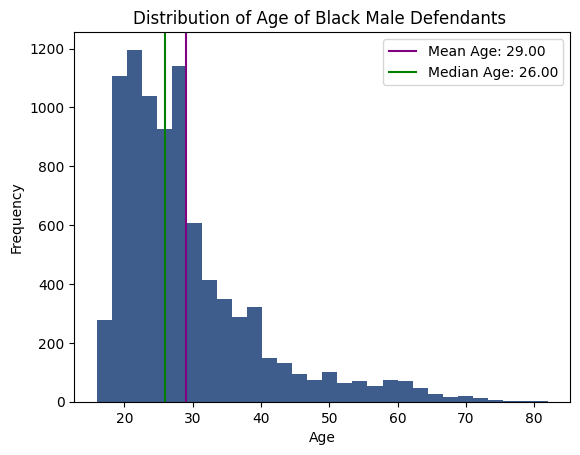

In [23]:
blackage = makeupdf[makeupdf["BlackMale"]== 1]
age = blackage["Age"]
print(age.min())
avdays =age.mean()
mediandays =age.median()
labelmean = f"Mean Age: {avdays:.2f}"
labelmedian = f"Median Age: {mediandays:.2f}"

plt.hist(age, bins=30, color = ['#3e5d8d'])
plt.axvline(x= avdays, c='purple', label=labelmean)
plt.axvline(x= mediandays, c='g',label = labelmedian)
plt.legend()

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Age of Black Male Defendants ")

Text(0.5, 1.0, 'Distribution of Age of Defendants exlcuding Black Males ')

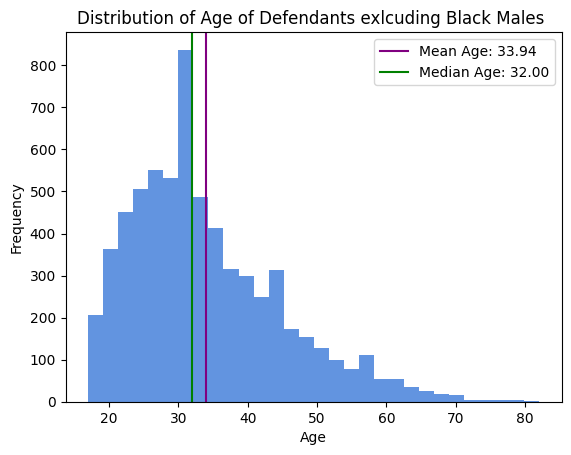

In [24]:
blackage = makeupdf[makeupdf["BlackMale"]== 0]
age = blackage["Age"]
avdays =age.mean()
mediandays =age.median()
labelmean = f"Mean Age: {avdays:.2f}"
labelmedian = f"Median Age: {mediandays:.2f}"

plt.hist(age, bins=30, color = ['#6294e0'])
plt.axvline(x= avdays, c='purple', label=labelmean)
plt.axvline(x= mediandays, c='g',label = labelmedian)
plt.legend()

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Age of Defendants exlcuding Black Males ")

Text(0.5, 1.0, 'Occurences of Article 701')

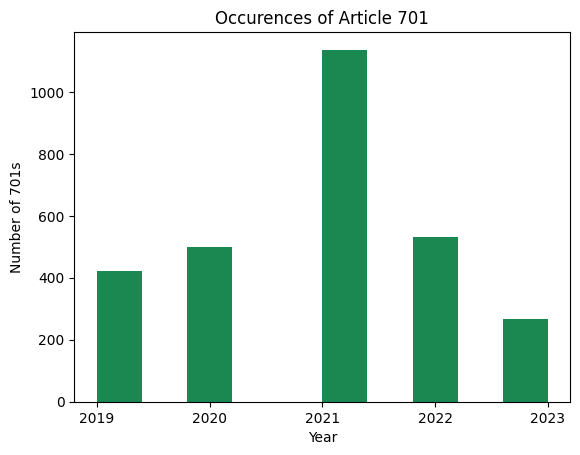

In [25]:
dataframe701 = dataframe701[dataframe701["Proceeding Date"] > pd.Timestamp("2018-12-31")]
dataframe701 = dataframe701[dataframe701["Proceeding Date"] < pd.Timestamp("2024-01-01")]
Proceeding = dataframe701[["Magistrate Number", "Proceeding Date", "Proceeding Text"]]

def find_701(s):
  if '701' in s:
    return True
  else:
    return False

Proceeding['Has701'] = Proceeding['Proceeding Text'].apply(find_701)
SevOPro = Proceeding[Proceeding.Has701 == True]
SevOPro["Year"] = SevOPro["Proceeding Date"].dt.year

plt.hist(SevOPro["Year"], bins = 10, color=['#1b8852'])
plt.xticks(range(int(SevOPro["Year"].min()), int(SevOPro["Year"].max()) + 1))
plt.xlabel('Year')
plt.ylabel('Number of 701s')
plt.title("Occurences of Article 701")

Text(0.5, 1.0, 'Occurences of Article 701 by Race')

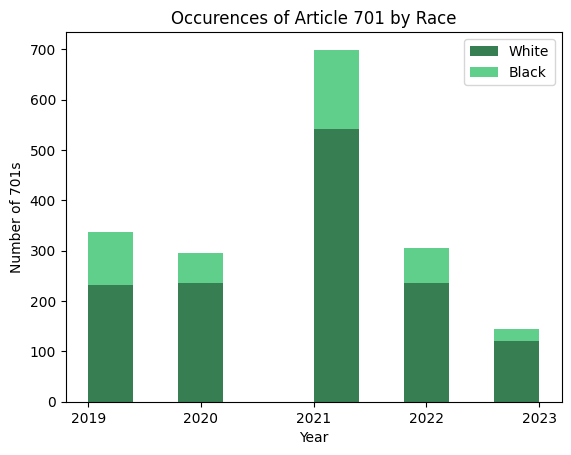

In [26]:
SevOPro1 = SevOPro.merge(dfinfo701, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
white_sev = SevOPro1[SevOPro1["Race"] == "White"]["Year"]
black_sev = SevOPro1[SevOPro1["Race"] == "Black"]["Year"]

plt.hist([black_sev, white_sev], bins=10, stacked=True, color=['#377e53', '#5fcf8b'],label=['White', 'Black'])
plt.legend()
plt.xticks(range(int(SevOPro["Year"].min()), int(SevOPro["Year"].max()) + 1))
plt.xlabel('Year')
plt.ylabel('Number of 701s')
plt.title("Occurences of Article 701 by Race")

In [27]:
amountofcases = len(Proceeding["Magistrate Number"].unique())
print("Out of " + str(amountofcases))
sev = len(SevOPro)
print(str(sev) + " instances of 701 identified in")
unisev = len(SevOPro["Magistrate Number"].unique())
print(str(unisev) + " unique cases")

Out of 31122
2854 instances of 701 identified in
2471 unique cases


In [28]:
dfcdc.rename(columns={'Proceeding Text': 'CDCText'}, inplace=True)
dataframe.rename(columns={'Proceeding Text': 'ProText'}, inplace=True)
dfcdc1 = dfcdc
dataframe1 = dataframe
dfcdc1["CDCText"] = dfcdc1["CDCText"].str.replace(r'\s+', ' ', regex=True)
dataframe1["ProText"] = dataframe1["ProText"].str.replace(r'\s+', ' ', regex=True)
dfcourt = pd.concat([dataframe1, dfcdc1])
dfcourt = dfcourt.drop(columns=["Clerk", "Section", "Magistrate", "Case ID"])
dfcourt = dfcourt.sort_values(by=['Magistrate Number', "Proceeding Date"], ascending = [True, True])
dfcourt = dfcourt.fillna(0)

##Custody

In [29]:
def CustodyCheck(s):
  if(s == 0):
    return 0
  elif ('IN CUSTODY') in s:
    return 1
  elif ('IS HELD IN') in s:
    return 1
  elif ('TRANSPORTED') in s:
    return 1
  elif ("FEDERAL CUSTODY") in s:
    return 1
  elif ("TRANSPORTED TO COURT") in s:
    return 1
  elif ("JAIL LIST") in s:
    return 1
  elif("SHE IS TO BE RELEASED") in s:
    return 1
  elif("HE IS TO BE RELEASED") in s:
    return 1
  elif("FILED ARREST ON CAPIAS") in s:
    return 1
  elif("ARRESTED") in s:
    return 1
  elif ("CAPIAS ISSUED") in s:
    return 2
  elif("ALIAS CAPIAS REMAINS") in s:
    return 2
  elif ("RELEASE ISSUED") in s:
    return 2
  elif ('FAILED TO APPEAR') in s:
    return 2
  elif("DID NOT APPEAR") in s:
    return 2
  elif("POSTED BOND") in s:
    return 2
  elif("POSTED BAIL") in s:
    return 2
  elif("HOUSE ARREST") in s:
    # print(s)
    return 2
  elif("SURETY") in s:
    return 2
  elif("STAY AWAY ORDER") in s:
    return 2
  else:
    return 3

dfcourt['CDC Custody'] = dfcourt['CDCText'].apply(CustodyCheck)
dfcourt['MCustody'] = dfcourt['ProText'].apply(CustodyCheck)
dfcourt["Custody"] = dfcourt["MCustody"] + dfcourt["CDC Custody"]
dfcourt = dfcourt.drop(columns=["CDC Custody", "MCustody"])

In [30]:
for i in range(len(dfcourt)):
  if dfcourt.ROR.iloc[i] == 1:
    dfcourt.Custody.iloc[i] = 2
  if dfcourt["Stay Away Order"].iloc[i] == 1:
    dfcourt.Custody.iloc[i] = 2

In [31]:
dataframedates = dataframe
dfcdcdates = dfcdc
dates = pd.concat([dfcdcdates, dataframedates])
first_dates = dates.sort_values('Proceeding Date').drop_duplicates(subset=['Magistrate Number'], keep='first')
last_dates = dates.sort_values('Proceeding Date').drop_duplicates(subset=['Magistrate Number'], keep='last')
finaldates = first_dates.merge(last_dates, on="Magistrate Number", suffixes=('_first', '_last'))
finaldates["Court Days"] = (finaldates["Proceeding Date_last"] - finaldates["Proceeding Date_first"]).dt.days
totaldaysdf = finaldates[['Magistrate Number', 'Court Days']]

Text(0.5, 1.0, 'Distribution of Duration of a Court Case ')

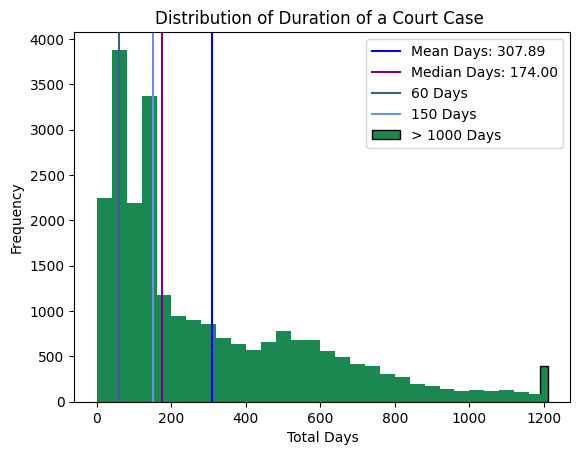

In [32]:
dfcourtdays = totaldaysdf
dfcourtdays["Court Days"] = finaldates["Court Days"].astype(float)
dfcourtdays1 = dfcourtdays[dfcourtdays["Court Days"] > 0]
dfcourtdays1 = dfcourtdays[dfcourtdays["Court Days"] <= 1200]

graphyear_extra = dfcourtdays[dfcourtdays["Court Days"] > 1200]
dfcourtdays1 = dfcourtdays1.drop_duplicates(subset=['Magistrate Number'], keep='first')
dayscourt = dfcourtdays1["Court Days"]

avdays =  dfcourtdays["Court Days"].mean()
mediandays =  dfcourtdays["Court Days"].median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)
plt.bar(1201, len(graphyear_extra), width=20, color='#1b8852', edgecolor="black", label='> 1000 Days')
plt.axvline(x=60, c='#3e5d8d', label='60 Days')
plt.axvline(x=150, c='#6294e0', label='150 Days')
plt.hist(dayscourt, bins = 30, color=['#1b8852'])

plt.legend()
plt.xlabel('Total Days')
plt.ylabel('Frequency')
plt.title("Distribution of Duration of a Court Case ")

In [33]:
cus = {'Magistrate Number': [0], 'Days in Custody': [0], 'Start Custody': [0], "End Custody": [0]}
cusinfo = pd.DataFrame(cus)
testdfcourt = dfcourt[["Magistrate Number", "Proceeding Date", "Custody"]]
cusstart = False
for i in range(len(testdfcourt)):
  magn = testdfcourt["Magistrate Number"].iloc[i]
  lastmagn = testdfcourt["Magistrate Number"].iloc[i-1]
  if (magn == lastmagn) or (i == 0):
    findlastentry = False
    if testdfcourt["Custody"].iloc[i] == 1:
      startdate = testdfcourt["Proceeding Date"].iloc[i]
      cusstart = True
      currmag = testdfcourt["Magistrate Number"].iloc[i]
    if testdfcourt["Custody"].iloc[i] == 2:
      if cusstart == True:
          endcus = testdfcourt["Proceeding Date"].iloc[i]
          dayscus =  (endcus - startdate)
          new = {'Magistrate Number': currmag, 'Days in Custody': [dayscus], 'Start Custody': [startdate], "End Custody": [endcus], "NoUpdate": [0]}
          new_row = pd.DataFrame(new)
          cusinfo = pd.concat([cusinfo, new_row], ignore_index=True)
          cusstart = False
  elif cusstart == True:
          i -= 1
          while findlastentry == False:
            if lastmagn == testdfcourt["Magistrate Number"].iloc[i]:
              findlastentry = True
              endcus = testdfcourt["Proceeding Date"].iloc[i]
              dayscus =  (endcus - startdate)
              new = {'Magistrate Number': lastmagn, 'Days in Custody': [dayscus], 'Start Custody': [startdate], "End Custody": [endcus], "NoUpdate": [1]}
              new_row = pd.DataFrame(new)
              cusinfo = pd.concat([cusinfo, new_row], ignore_index=True)
              cusstart = False
            else:
              i -= 1
              print(i)
cusinfo = cusinfo.drop(index=0)
cusinfo['Days in Custody'] = pd.to_timedelta(cusinfo['Days in Custody'], errors='coerce')
cusinfo["Days Float"] = cusinfo['Days in Custody'].dt.total_seconds() / (24 * 3600)
cusinfopred1 = cusinfo

In [34]:
amountofcases = len(testdfcourt["Magistrate Number"].unique())
print("Out of " + str(amountofcases))
custody = len(cusinfo)
print(str(custody) + " instances of cutody identified in")
unicus = len(cusinfo["Magistrate Number"].unique())
print(str(unicus) + " unique cases")

Out of 24326
7778 instances of cutody identified in
5236 unique cases


In [35]:
custodyval = cusinfo["Days Float"]
custody = casedf.merge(cusinfo, on=["Magistrate Number"], how='left')
custody = custody.drop_duplicates(subset=['Magistrate Number'])
custody =custody.fillna(0)
custodyval = custody["Days Float"]
custodymean = custodyval.mean()
print(f"Including all cases, the average time in custody is {custodymean:.2f} days")

Including all cases, the average time in custody is 12.57 days


Distribution of Custody Lengths from a day or more to 100 days

Text(0.5, 1.0, 'Distribution of Days in Custody from 1 day to 100 days ')

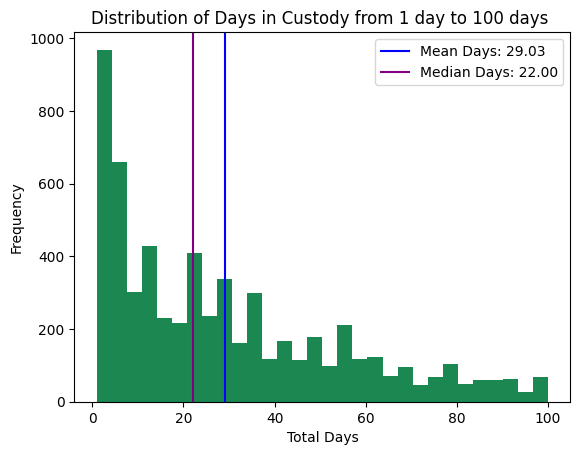

In [36]:
cusdf = cusinfo[cusinfo["Days Float"] <= 100]
cusdf = cusdf[cusdf["Days Float"] > 0]
vals = cusdf["Days Float"]
plt.hist(vals, bins = 30, color=['#1b8852'])

avdays =vals.mean()
mediandays =vals.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)
plt.legend()

plt.xlabel('Total Days')
plt.ylabel('Frequency')
plt.title("Distribution of Days in Custody from 1 day to 100 days ")

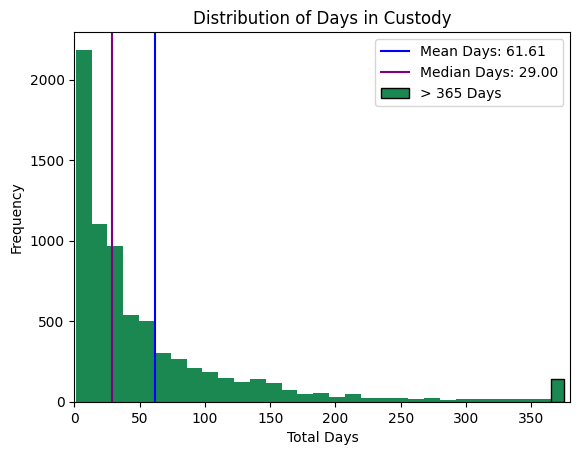

In [37]:
yearcus = cusinfo[cusinfo['Days Float'] > 0]
graphyear_main = yearcus[yearcus['Days Float'] <= 365]["Days Float"]
graphyear_extra = yearcus[yearcus['Days Float'] > 365]
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1095]["Days Float"]

plt.hist(graphyear_main, bins=30, color='#1b8852', align='mid')
plt.bar(370, len(graphyear_extra), width=10, color='#1b8852', edgecolor="black", label='> 365 Days')

avdays = yearcus["Days Float"].mean()
mediandays = yearcus["Days Float"].median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.axvline(x=avdays, color='blue', label=labelmean)
plt.axvline(x=mediandays, color='purple', label=labelmedian)

plt.legend()
plt.xlabel('Total Days')
plt.ylabel('Frequency')
plt.title("Distribution of Days in Custody")

plt.xlim(0, 380)
plt.show()

Text(0.5, 1.0, 'Distribution of Days in Custody from 100 days to 2 Years')

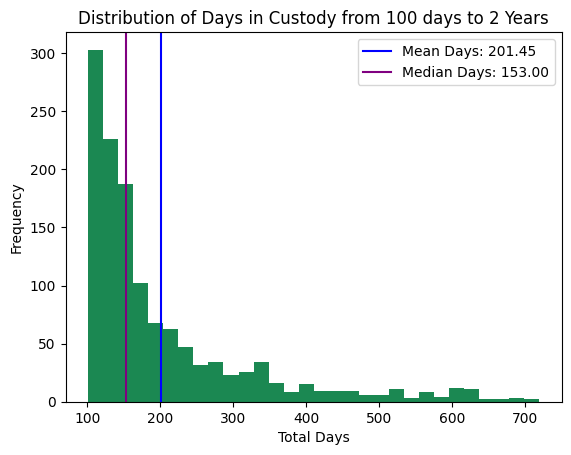

In [38]:
cusvals = cusinfo[cusinfo['Days Float']< 730]
cusvals = cusvals[cusvals['Days Float']> 100]
graphcus = cusvals["Days Float"]
plt.hist(graphcus, bins = 30, color=['#1b8852'])

plt.xlabel('Total Days')
plt.ylabel('Frequency')
avdays =graphcus.mean()
mediandays =graphcus.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)
plt.legend()

plt.title("Distribution of Days in Custody from 100 days to 2 Years")

In [39]:
dfcourtcus = dfcourt[["Magistrate Number"]]
dfcourtcus["Custody"] = 0
dfcourtcus = dfcourtcus.drop_duplicates(subset=['Magistrate Number'], keep='last')
cusinfocourt = cusinfo[["Magistrate Number", "Days Float"]]
cusinfocourt.rename(columns={'Days Float': 'Custody'}, inplace=True)
combined_df = pd.merge(dfcourtcus, cusinfocourt, on="Magistrate Number", how="left", suffixes=('_left', '_right'))
combined_df["Days Float"] = combined_df["Custody_left"].fillna(0) + combined_df["Custody_right"].fillna(0)
final_df = combined_df.groupby("Magistrate Number", as_index=False)["Days Float"].sum()

Total time in custody for unique magistarte numbers rather than including multiple instances as seperate


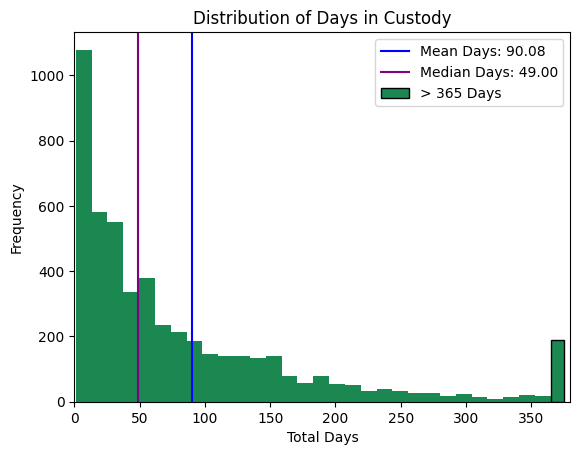

In [40]:
print("Total time in custody for unique magistarte numbers rather than including multiple instances as seperate")
yearcus = final_df[final_df['Days Float'] > 0]
graphyear_main = yearcus[yearcus['Days Float'] <= 365]["Days Float"]
graphyear_extra = yearcus[yearcus['Days Float'] > 365]
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1095]["Days Float"]

plt.hist(graphyear_main, bins=30, color='#1b8852', align='mid')
plt.bar(370, len(graphyear_extra), width=10, color='#1b8852', edgecolor="black", label='> 365 Days')

avdays = yearcus["Days Float"].mean()
mediandays = yearcus["Days Float"].median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.axvline(x=avdays, color='blue', label=labelmean)
plt.axvline(x=mediandays, color='purple', label=labelmedian)

plt.legend()
plt.xlabel('Total Days')
plt.ylabel('Frequency')
plt.title("Distribution of Days in Custody")

plt.xlim(0, 380)
plt.show()

Want to make sure that magistrate numbers are unique and there are no duplicate cases, the goal should be to add custody values identified so that can estimate total time in custody

In [41]:
lencus = len(cusinfocourt["Magistrate Number"].unique())
nonunicus = len(cusinfocourt)
lencourt = len(dfcourtcus)
percencus = (lencus/lencourt) *100
print("Out of " + str(lencourt) +" cases, " + str(lencus) + " were identified to have spent time in custody at " + "{:.2f}".format(percencus) + "% of cases")
print(nonunicus)

Out of 24326 cases, 5236 were identified to have spent time in custody at 21.52% of cases
7778


In [42]:
days = cusinfo[cusinfo["Days Float"]> 0]
days = days[days["Days Float"]< 731]

days = days["Days Float"]
avdays = days.mean()
meddays = days.median()
stdvdays = days.std()
mindays = days.min()
maxdays = days.max()

print("Given that defendant spends time in custody...")
print(f"The Average Days in jail: {avdays:.2f}")
print(f"The Median Days in jail: {meddays:.1f}")
print(f"Standard Deviation of days in jail: {stdvdays:.2f}")
print("Minimum days in jail: ", mindays)
print("Maximum days in jail: ", maxdays)

Given that defendant spends time in custody...
The Average Days in jail: 59.00
The Median Days in jail: 29.0
Standard Deviation of days in jail: 85.59
Minimum days in jail:  1.0
Maximum days in jail:  719.0


In [43]:
days = cusinfo[cusinfo["Days Float"]> 1]
days = days[days["Days Float"]< 365]
days = days["Days Float"]

avdays = days.mean()
meddays = days.median()
stdvdays = days.std()
mindays = days.min()
maxdays = days.max()

print("Using only Custody durations ranging between a day and a year...")
print("The Average Days in jail: ", avdays, )
print("The Median Days in jail: ", meddays, )
print("Standard Deviation of days in jail: ", stdvdays)
print("Minimum days in jail: ", mindays)
print("Maximum days in jail: ", maxdays)

Using only Custody durations ranging between a day and a year...
The Average Days in jail:  54.45930913348946
The Median Days in jail:  31.0
Standard Deviation of days in jail:  62.45589711749973
Minimum days in jail:  2.0
Maximum days in jail:  362.0


Text(0.5, 1.0, 'Black Custody')

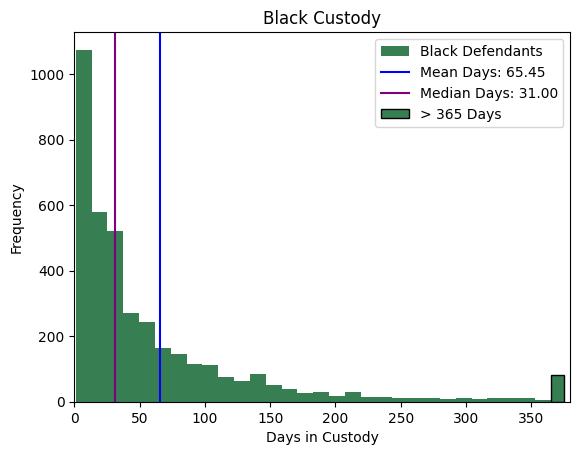

In [44]:
dfinfocus = dfinfo
dfinfocus = cusinfo.merge(dfinfocus, on=["Magistrate Number"], how='right')
dfinfocus = dfinfocus[dfinfocus['Days Float'] > 0]
black_days = dfinfocus[dfinfocus["Race"] == "Black"]

graphyear_main = black_days[black_days['Days Float'] <= 365]["Days Float"]
graphyear_extra = black_days[black_days['Days Float'] > 365]
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1095]["Days Float"]

black_days = dfinfocus[dfinfocus["Race"] == "Black"]["Days Float"]

plt.hist(graphyear_main,  bins=30, color =['#377e53'], label=['Black Defendants'])
plt.bar(370, len(graphyear_extra), width=10, color='#377e53', edgecolor="black", label='> 365 Days')
avdays = black_days.mean()
mediandays = black_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.axvline(x=avdays, color='blue', label=labelmean)
plt.axvline(x=mediandays, color='purple', label=labelmedian)


plt.xlim(0, 380)
plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Black Custody")

Text(0.5, 1.0, 'White Custody')

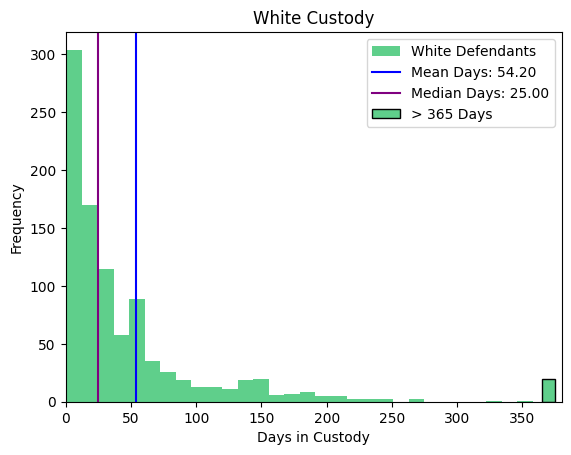

In [45]:
dfinfocus = dfinfo
dfinfocus = cusinfo.merge(dfinfocus, on=["Magistrate Number"], how='right')
dfinfocus = dfinfocus[dfinfocus['Days Float'] > 0]
white_days = dfinfocus[dfinfocus["Race"] == "White"]

graphyear_main = white_days[white_days['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = white_days[white_days['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1095]["Days Float"]  # > 365 days

white_days = white_days["Days Float"]

plt.hist(graphyear_main,  bins=30, color =['#5fcf8b'], label=['White Defendants'])
plt.bar(370, len(graphyear_extra), width=10, color='#5fcf8b', edgecolor="black", label='> 365 Days')
avdays = white_days.mean()
mediandays = white_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.axvline(x=avdays, color='blue', label=labelmean)
plt.axvline(x=mediandays, color='purple', label=labelmedian)


plt.xlim(0, 380)
plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("White Custody")

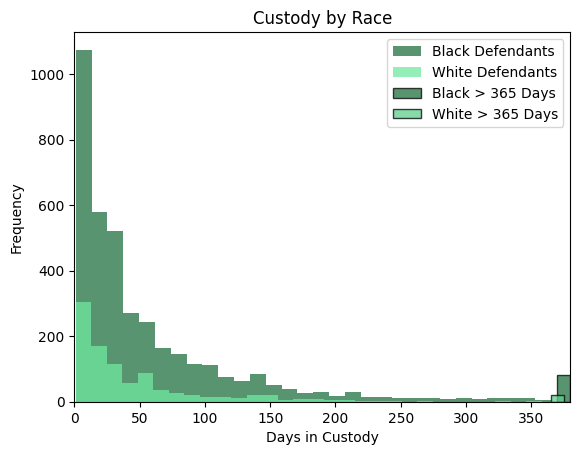

In [46]:
dfinfocus = dfinfo
dfinfocus = cusinfo.merge(dfinfocus, on=["Magistrate Number"], how='right')
dfinfocus = dfinfocus[dfinfocus['Days Float'] > 0]

white_days = dfinfocus[dfinfocus["Race"] == "White"]["Days Float"]
black_days = dfinfocus[dfinfocus["Race"] == "Black"]["Days Float"]

white_main = white_days[white_days <= 365]
black_main = black_days[black_days <= 365]

white_extra = white_days[(white_days > 365) & (white_days < 1095)]
black_extra = black_days[(black_days > 365) & (black_days < 1095)]

plt.hist(black_main, bins=30, alpha=0.75, color='#227041', label='Black Defendants')
plt.hist(white_main, bins=30, alpha=0.75, color='#6fe99f', label='White Defendants')

plt.bar(375, len(black_extra), width=10, alpha=0.75, color='#227041', edgecolor="black", label='Black > 365 Days')
plt.bar(370, len(white_extra), width=10, alpha=0.75, color='#5fcf8b', edgecolor="black", label='White > 365 Days')

white_mean = white_days.mean()
white_median = white_days.median()

black_mean = black_days.mean()
black_median = black_days.median()

plt.xlim(0, 380)
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Custody by Race")
plt.legend()
plt.show()

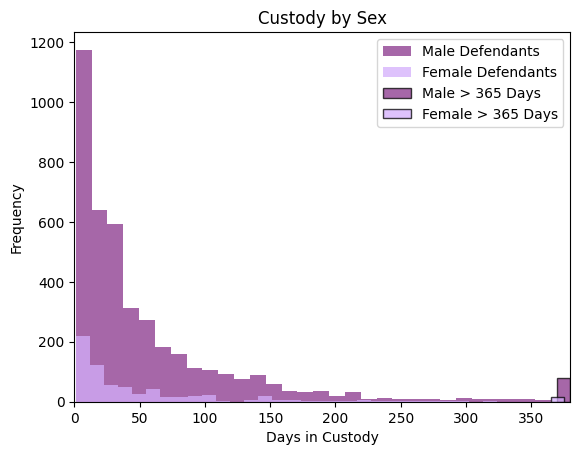

In [47]:
dfinfocus = dfinfo
dfinfocus = cusinfo.merge(dfinfocus, on=["Magistrate Number"], how='right')
dfinfocus = dfinfocus[dfinfocus['Days Float'] > 0]

female_days = dfinfocus[dfinfocus["Sex"] == "Female"]["Days Float"]
male_days = dfinfocus[dfinfocus["Sex"] == "Male"]["Days Float"]

female_main = female_days[female_days <= 365]
male_main = male_days[male_days <= 365]

female_extra = female_days[(female_days > 365) & (white_days < 1095)]
male_extra = male_days[(male_days > 365) & (male_days < 1095)]

plt.hist(male_main, bins=30, alpha=0.75, color='#88348b', label='Male Defendants')
plt.hist(female_main, bins=30, alpha=0.75, color='#d4aefc', label='Female Defendants')

plt.bar(375, len(male_extra), width=10, alpha=0.75, color='#88348b', edgecolor="black", label='Male > 365 Days')
plt.bar(370, len(female_extra), width=10, alpha=0.75, color='#d4aefc', edgecolor="black", label='Female > 365 Days')

plt.xlim(0, 380)
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Custody by Sex")
plt.legend()
plt.show()

In [48]:
print(len(female_days))
print(len(male_days))

683
4217


In [49]:
dfinfocus = dfinfo
dfinfocus = cusinfo.merge(dfinfocus, on=["Magistrate Number"], how='right')
dfinfocus = dfinfocus[dfinfocus['Days Float'] > 0]
lenw = len(days)
lentotalcus = len(dfinfocus)

print(lenw)
print(lenw/lentotalcus)
lentotalcus = len(dfinfocus)
days = black_days
avdays = days.mean()
meddays = days.median()
stdvdays = days.std()
mindays = days.min()
maxdays = days.max()
lenb = len(days)
print(lenb)
print(lentotalcus)
print(lenb/lentotalcus)
print("Isolating for only black defendants who have spent time in custody ranging from a day to a year")
print("The Average Days in jail: ", avdays, )
print("The Median Days in jail: ", meddays, )
print("Standard Deviation of days in jail: ", stdvdays)
print("Minimum days in jail: ", mindays)
print("Maximum days in jail: ", maxdays)

6832
1.3942857142857144
3853
4900
0.7863265306122449
Isolating for only black defendants who have spent time in custody ranging from a day to a year
The Average Days in jail:  65.45419153906047
The Median Days in jail:  31.0
Standard Deviation of days in jail:  105.82076134616163
Minimum days in jail:  1.0
Maximum days in jail:  1285.0


In [50]:
print(len(white_days))
print(len(black_days))

953
3853


In [51]:
days = white_days
avdays = days.mean()
meddays = days.median()
stdvdays = days.std()
mindays = days.min()
maxdays = days.max()
lenw = len(days)
print(lenw)
print(lenw/lentotalcus)
print("Isolating for only white defendants who have spent time in custody ranging from a day to a year")
print("The Average Days in jail: ", avdays, )
print("The Median Days in jail: ", meddays, )
print("Standard Deviation of days in jail: ", stdvdays)
print("Minimum days in jail: ", mindays)
print("Maximum days in jail: ", maxdays)

953
0.19448979591836735
Isolating for only white defendants who have spent time in custody ranging from a day to a year
The Average Days in jail:  54.197271773347325
The Median Days in jail:  25.0
Standard Deviation of days in jail:  97.08726967901308
Minimum days in jail:  1.0
Maximum days in jail:  955.0


955.0


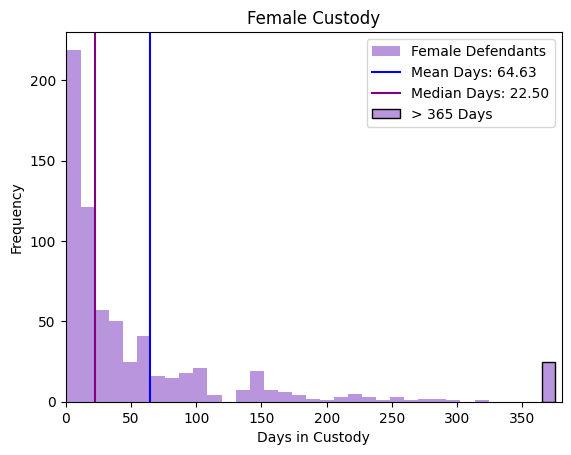

In [52]:
dfinfocus = dfinfo
dfinfocus = cusinfo.merge(dfinfocus, on=["Magistrate Number"], how='right')
dfinfocus = dfinfocus[dfinfocus['Days Float'] > 0]
female_days = dfinfocus[dfinfocus["Sex"] == "Female"]
female_days = female_days[female_days['Days Float'] < 1000]

graphyear_main = female_days[female_days['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = female_days[female_days['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1000]["Days Float"]  # > 365 days

female_days = female_days["Days Float"]

plt.hist(graphyear_main,  bins=30, color =["#b895dd"], label=['Female Defendants'])
plt.bar(370, len(graphyear_extra), width=10, color='#b895dd', edgecolor="black", label='> 365 Days')
#  ['#88348b', '#b895dd']

avdays = female_days.mean()
mediandays = female_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.axvline(x=avdays, color='blue', label=labelmean)
plt.axvline(x=mediandays, color='purple', label=labelmedian)


plt.xlim(0, 380)
plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Female Custody")
print((female_days.max()))

Text(0.5, 1.0, 'Male Custody')

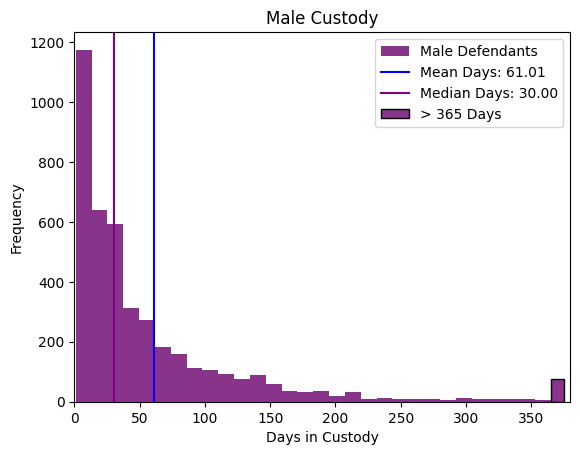

In [53]:
dfinfocus = dfinfo
dfinfocus = cusinfo.merge(dfinfocus, on=["Magistrate Number"], how='right')
dfinfocus = dfinfocus[dfinfocus['Days Float'] > 0]
male_days = dfinfocus[dfinfocus["Sex"] == "Male"]
male_days = male_days[male_days['Days Float'] < 1000]


graphyear_main = male_days[male_days['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = male_days[male_days['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1000]["Days Float"]  # > 365 days

male_days = male_days["Days Float"]

plt.hist(graphyear_main,  bins=30, color =["#88348b"], label=['Male Defendants'])
plt.bar(370, len(graphyear_extra), width=10, color="#88348b", edgecolor="black", label='> 365 Days')

avdays = male_days.mean()
mediandays = male_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.axvline(x=avdays, color='blue', label=labelmean)
plt.axvline(x=mediandays, color='purple', label=labelmedian)


plt.xlim(0, 380)
plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Male Custody")

In [54]:
dfinfocus = dfinfo
dfinfocus = cusinfo.merge(dfinfocus, on=["Magistrate Number"], how='right')
dfinfocus = dfinfocus[dfinfocus['Days Float'] > 0]
female_days
lentotalcus = len(dfinfocus)
lenf = len(female_days)
print(lenf)
print(lenf/lentotalcus)
lenm = len(male_days)
print(lenm)
print(lenm/lentotalcus)


680
0.13877551020408163
4213
0.8597959183673469


Text(0.5, 1.0, 'Defendants Older than 35 Custody')

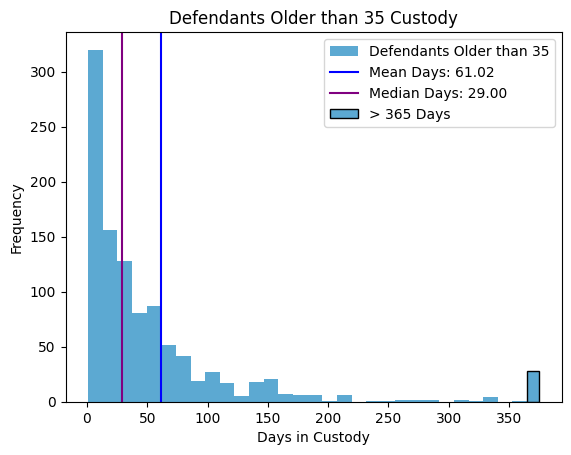

In [55]:
agehold = makeupdf[["Magistrate Number", "Age"]]
dfinfocus = dfinfocus.merge(agehold, on=["Magistrate Number"], how='left')

old_days1 = dfinfocus[dfinfocus["Age"] > 35]

graphyear_main = old_days1[old_days1['Days Float'] <= 365]["Days Float"]
graphyear_extra = old_days1[old_days1['Days Float'] > 365]
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1000]["Days Float"]

old_days1 = old_days1["Days Float"]
plt.hist(graphyear_main,  bins=30, color =["#5ca9d2"], label=['Defendants Older than 35'])
plt.bar(370, len(graphyear_extra), width=10, color="#5ca9d2", edgecolor="black", label='> 365 Days')

avdays =old_days1.mean()
mediandays =old_days1.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Defendants Older than 35 Custody")

Text(0.5, 1.0, 'Defendants 35 and Younger Custody')

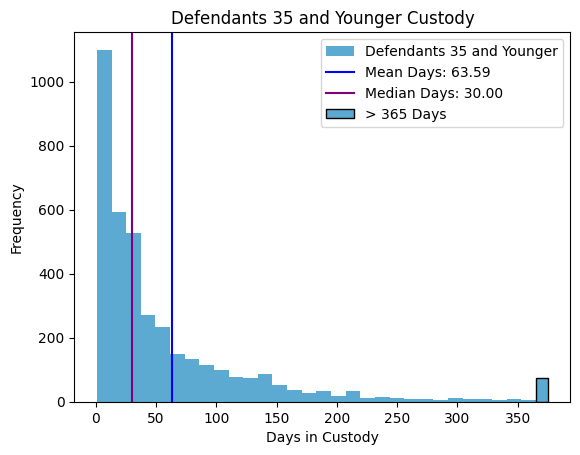

In [56]:
young_days = dfinfocus[dfinfocus["Age"]<= 35]

graphyear_main = young_days[young_days['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = young_days[young_days['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1000]["Days Float"]  # > 365 days

young_days = young_days["Days Float"]

plt.hist(graphyear_main,  bins=30, color =["#5ca9d2"], label=['Defendants 35 and Younger'])
plt.bar(370, len(graphyear_extra), width=10, color="#5ca9d2", edgecolor="black", label='> 365 Days')



avdays =young_days.mean()
mediandays =young_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Defendants 35 and Younger Custody")

Text(0.5, 1.0, 'Defendants between 30 and 45')

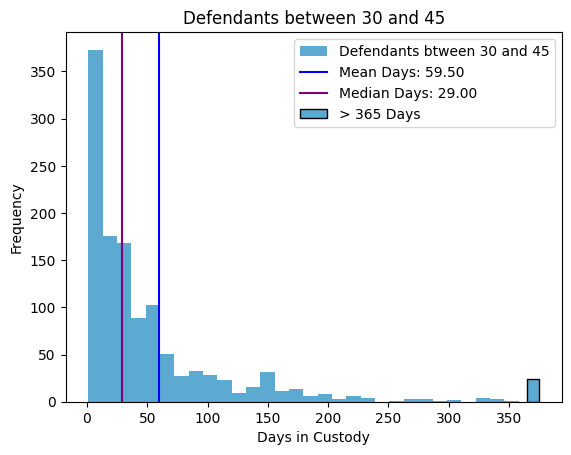

In [57]:
young_days = dfinfocus[dfinfocus["Age"] > 30]
young_days = young_days[young_days["Age"] < 45]

graphyear_main = young_days[young_days['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = young_days[young_days['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1000]["Days Float"]  # > 365 days

young_days = young_days["Days Float"]

plt.hist(graphyear_main,  bins=30, color =["#5ca9d2"], label=['Defendants btween 30 and 45'])
plt.bar(370, len(graphyear_extra), width=10, color="#5ca9d2", edgecolor="black", label='> 365 Days')

avdays =young_days.mean()
mediandays =young_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Defendants between 30 and 45")

In [58]:
chargedf = dfcharge
chargedf = chargedf.merge(final_df, left_on="Magistrate Number", right_on="Magistrate Number", how='inner')
chargedf =chargedf.drop(columns=["Charge Code", "Bond", "Count"])
dfwcharge = chargedf
chargedf = chargedf.groupby('Charge Name').apply(lambda x: pd.Series({
    'Total Cases': len(x),
    '% Cases with Custody': f"{(x['Days Float'] > 1).mean() * 100:.2f}",
    'Average Days in Custody':f"{x['Days Float'].mean():.2f}",
    'Average Days Given Custody': f"{x.loc[x['Days Float'] > 1, 'Days Float'].mean():.2f}"
})).reset_index()
print("Number of unique charges:")
print(len(chargedf["Charge Name"].unique()))
print("Average number of times a charge is filed:")
print(chargedf["Total Cases"].mean())
print("Median number of times a charge is filed:")
print(chargedf["Total Cases"].mean())
chargedf['% Cases with Custody'] = pd.to_numeric(chargedf['% Cases with Custody'], errors='coerce')
chargedf['Total Cases'] = pd.to_numeric(chargedf['Total Cases'], errors='coerce')
chargedf = chargedf[chargedf["Total Cases"] > 15]
chargedf["Average Days in Custody"] = pd.to_numeric(chargedf["Average Days in Custody"], errors="coerce")
chargedf["Average Days Given Custody"] = pd.to_numeric(chargedf["Average Days Given Custody"], errors="coerce")
chargedf = chargedf.dropna()

Number of unique charges:
1118
Average number of times a charge is filed:
60.1180679785331
Median number of times a charge is filed:
60.1180679785331


In [59]:
print("Number of unique charges filed at least 15 times:")
print(len(chargedf["Charge Name"].unique()))

Number of unique charges filed at least 15 times:
324


In [60]:
chargedf = chargedf.sort_values(by=['% Cases with Custody'], ascending = [False])
styled_df = chargedf.head(10).style.format({
    'Total Cases': "{:.2f}",
    '% Cases with Custody': "{:.2f}%",
    'Average Days in Custody': "{:.2f}",
    'Average Days Given Custody': "{:.2f}"
}).background_gradient(subset=['% Cases with Custody', 'Average Days in Custody', 'Average Days Given Custody'], cmap='coolwarm')
styled_df

,Charge Name,Total Cases,% Cases with Custody,Average Days in Custody,Average Days Given Custody
215,CONSP 2ND DEGREE MURDER,16.00,75.00%,61.81,82.42
819,PRINCIPAL 2ND DEGREE MURDER,16.00,75.00%,113.62,151.50
180,BATTERY POLICE OFFICER CUSTODY D O C,16.00,75.00%,103.31,137.75
70,ATT 1ST DEGREE MURDER,94.00,72.34%,96.51,133.41
6,2ND DEGREE MURDER,306.00,67.97%,111.52,164.05
168,BATTERY - CORRECTIONAL FACILITY EMPLOYEE,82.00,67.07%,73.16,109.07
123,ATT SECOND DEGREE RAPE,21.00,66.67%,136.43,204.64
945,SECOND DEGREE KIDNAPPING,102.00,65.69%,92.03,140.10
577,MANSLAUGHTER,39.00,64.10%,123.31,192.36
82,ATT ARMED ROBBERY,66.00,63.64%,68.92,108.31


In [61]:
chargedf = chargedf.sort_values(by=['Total Cases'], ascending = [False])
styled_df = chargedf.head(10).style.format({
    'Total Cases': "{:}",
    '% Cases with Custody': "{:.2f}%",
    'Average Days in Custody': "{:.2f}",
    'Average Days Given Custody': "{:.2f}"
}).background_gradient(subset=['% Cases with Custody', 'Average Days in Custody', 'Average Days Given Custody'], cmap='coolwarm')
styled_df

,Charge Name,Total Cases,% Cases with Custody,Average Days in Custody,Average Days Given Custody
363,DOMESTIC ABUSE BATTERY,4361,11.21%,7.41,66.03
687,POSS OF A FIREARM OR WEAPON BY FELON,2218,40.62%,42.68,105.03
979,SIMPLE CRIMINAL DAMAGE TO PROPERTY,2006,18.64%,14.15,75.88
369,DOMESTIC ABUSE CHILD ENDANGEMENT LAW,1524,13.45%,10.79,80.13
964,SIMPLE BATTERY,1397,21.55%,18.62,86.40
968,SIMPLE BURGLARY,1345,42.08%,46.47,110.40
512,ILLEGAL CARRYING WEAPONS,1303,24.25%,28.03,115.58
511,ILLEGAL CARRYING WEAPON WITH CDS,1293,28.15%,27.69,98.34
42,AGG ASSAULT WITH A FIREARM,1261,25.77%,26.23,101.75
931,RESISTING AN OFFICER,1244,34.97%,37.18,106.28


In [62]:
chargedfav = chargedf.sort_values(by=['Average Days in Custody'], ascending = [False])
styled_df = chargedfav.head(10).style.format({
    'Total Cases': "{:}",
    '% Cases with Custody': "{:.2f}%",
    'Average Days in Custody': "{:.2f}",
    'Average Days Given Custody': "{:.2f}"
}).background_gradient(subset=['% Cases with Custody', 'Average Days in Custody', 'Average Days Given Custody'], cmap='coolwarm')
styled_df

,Charge Name,Total Cases,% Cases with Custody,Average Days in Custody,Average Days Given Custody
123,ATT SECOND DEGREE RAPE,21,66.67%,136.43,204.64
146,ATT THEFT OF AN AUTO,17,52.94%,132.65,250.56
577,MANSLAUGHTER,39,64.10%,123.31,192.36
819,PRINCIPAL 2ND DEGREE MURDER,16,75.00%,113.62,151.50
6,2ND DEGREE MURDER,306,67.97%,111.52,164.05
180,BATTERY POLICE OFFICER CUSTODY D O C,16,75.00%,103.31,137.75
70,ATT 1ST DEGREE MURDER,94,72.34%,96.51,133.41
945,SECOND DEGREE KIDNAPPING,102,65.69%,92.03,140.10
866,PWIT DISTRIBUTE ALPRAZOLAM,18,27.78%,91.89,330.80
658,PORNOGRAPHY INVOLVING JUVENILES,34,35.29%,91.06,258.00


In [63]:
chargedfavgiv = chargedf.sort_values(by=['Average Days Given Custody'], ascending = [False])
styled_df = chargedfavgiv.head(10).style.format({
    'Total Cases': "{:}",
    '% Cases with Custody': "{:.2f}%",
    'Average Days in Custody': "{:.2f}",
    'Average Days Given Custody': "{:.2f}"
}).background_gradient(subset=['% Cases with Custody', 'Average Days in Custody', 'Average Days Given Custody'], cmap='coolwarm')
styled_df

,Charge Name,Total Cases,% Cases with Custody,Average Days in Custody,Average Days Given Custody
866,PWIT DISTRIBUTE ALPRAZOLAM,18,27.78%,91.89,330.80
658,PORNOGRAPHY INVOLVING JUVENILES,34,35.29%,91.06,258.00
146,ATT THEFT OF AN AUTO,17,52.94%,132.65,250.56
914,PWIT THC GREATER THAN 2.5 LBS,36,33.33%,82.50,247.50
847,PWIT AMPHETAMINE LESS THAN 28GRAMS,32,31.25%,68.91,220.40
940,SCHEDULE II DRUGS,41,9.76%,20.20,207.00
123,ATT SECOND DEGREE RAPE,21,66.67%,136.43,204.64
788,PRIN AGGRAVATED ASSAULT W/FIREARM,24,25.00%,48.75,195.00
601,NEGLIGENT HOMICIDE,20,45.00%,86.90,193.11
577,MANSLAUGHTER,39,64.10%,123.31,192.36


In [64]:
dfwcharge

,Magistrate Number,Charge Name,Violent Crime,Domestic Violence,Child Abuse,Property Crime,Substance Use,Sex Offense,Public Health Violation,Days Float
0,580322,POSS OF DRUG PARAPHERNALIA,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,580322,POSS OF COCAINE LESS THAN 2 GRAMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,580322,POSSESSION OF COCAINE (CRACK),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,580323,SEXUAL BATTERY,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
4,580324,"THEFT 750.00 LESS THAN 5,000.00",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
67207,595929,DOMESTIC ABUSE BATTERY,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
67208,595930,UNAUTHORIZED ENTRY INHABITED DWELLING,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67209,595930,HOME INVASION,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67210,595931,DOMESTIC ABUSE BATTERY,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
murder = dfwcharge[(dfwcharge["Charge Name"] == "MANSLAUGHTER")|
                   (dfwcharge["Charge Name"] == "ATT 1ST DEGREE MURDER" )|
                   (dfwcharge["Charge Name"] == "ATT 2ND DEGREE MURDER" )|
                   (dfwcharge["Charge Name"] == "2ND DEGREE MURDER")]
print("average of murder charges from final_df")
print(murder["Days Float"].mean())
test = murder[murder["Days Float"] > 0]
print("average of murder charges from final_df with nonzero values")
print(test["Days Float"].mean())
print("Unique mag vals")
print(len(murder["Magistrate Number"].unique()))
print("Total mag vals")
print(len(murder))
murder = murder.fillna(0)
murder = murder.merge(dfinfocus, on=["Magistrate Number"], how='left')
print("Unique mag vals after merge")
print(len(murder["Magistrate Number"].unique()))
print("Total mag vals after merge")
print(len(murder))
test = murder[murder["Days Float_y"] > 0]
print("Average from dfinfocus after merge")
print(test["Days Float_y"].mean())
print("Average from dfwcharge after merge")
test = murder[murder["Days Float_x"] > 0]
print(test["Days Float_x"].mean())

average of murder charges from final_df
89.34233128834356
average of murder charges from final_df with nonzero values
144.47222222222223
Unique mag vals
611
Total mag vals
815
Unique mag vals after merge
611
Total mag vals after merge
1252
Average from dfinfocus after merge
73.77923784494087
Average from dfwcharge after merge
176.22848034006375


Text(0.5, 1.0, 'Manslaughter Custody')

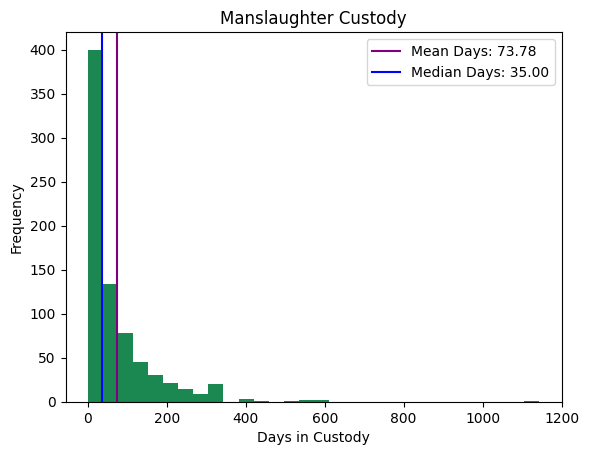

In [66]:
daygraph = murder["Days Float_y"]
avdays =daygraph.mean()
mediandays =daygraph.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.hist(daygraph, bins=30, color = ['#1b8852'])
plt.axvline(x= avdays, c='purple', label=labelmean)
plt.axvline(x= mediandays, c='blue',label = labelmedian)
plt.legend()

plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Manslaughter Custody")

Text(0.5, 1.0, 'Violent Crime Custody')

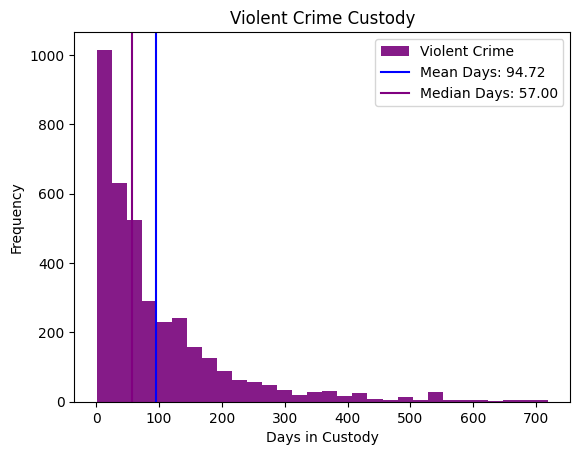

In [67]:
vcdf  = dfwcharge[dfwcharge["Violent Crime"] == 1.0]
vcdf
vcdf = vcdf[vcdf['Days Float'] <=730]
vcdf = vcdf[vcdf['Days Float'] > 0]
vcdays = vcdf["Days Float"]

plt.hist(vcdays, bins=30, color =['#851b88'], label=['Violent Crime'])

avdays =vcdays.mean()
mediandays =vcdays.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Violent Crime Custody")

Text(0.5, 1.0, 'Domestic Violence Custody')

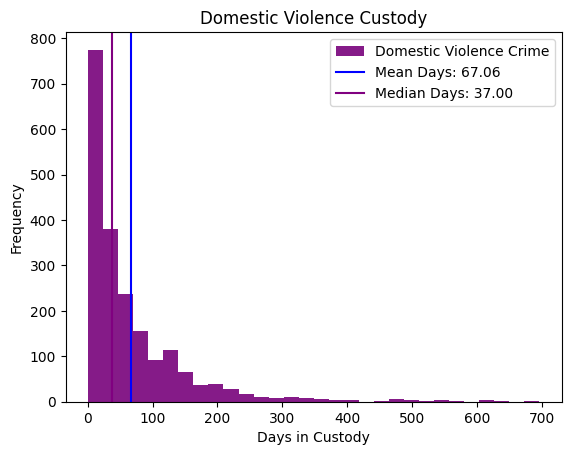

In [68]:
vcdf1  = dfwcharge[dfwcharge["Domestic Violence"] == 1.0]
vcdf1 = vcdf1[vcdf1['Days Float'] <=730]
vcdf1 = vcdf1[vcdf1['Days Float'] > 0]
vcdays1 = vcdf1["Days Float"]

plt.hist(vcdays1, bins=30, color =['#851b88'], label=['Domestic Violence Crime'])

avdays =vcdays1.mean()
mediandays =vcdays1.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Domestic Violence Custody")

Text(0.5, 1.0, 'Sex Offense Custody')

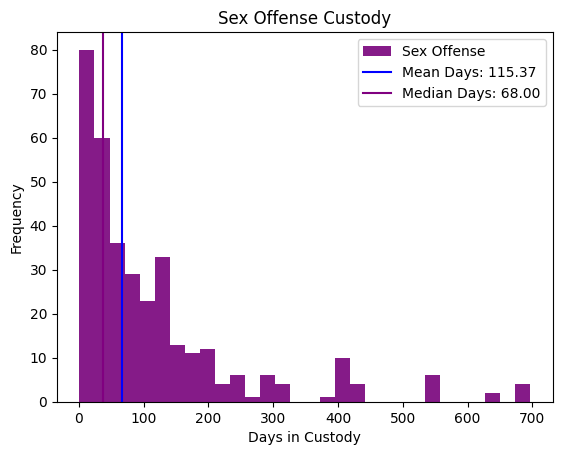

In [69]:
vcdf2  = dfwcharge[dfwcharge["Sex Offense"] == 1.0]
vcdf2 = vcdf2[vcdf2['Days Float'] <=730]
vcdf2 = vcdf2[vcdf2['Days Float'] > 0]
vcdays2 = vcdf2["Days Float"]

plt.hist(vcdays2, bins=30, color =['#851b88'], label=['Sex Offense'])

avdays2 =vcdays2.mean()
mediandays2 =vcdays2.median()
labelmean = f"Mean Days: {avdays2:.2f}"
labelmedian = f"Median Days: {mediandays2:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Sex Offense Custody")

Text(0.5, 1.0, 'Substance Use Custody')

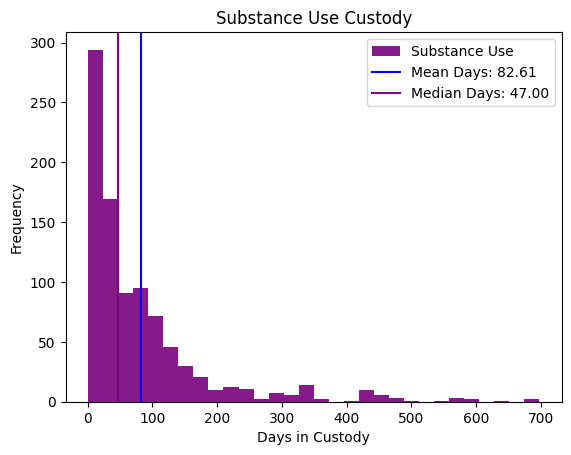

In [70]:
vcdf  = dfwcharge[dfwcharge["Substance Use"] == 1.0]
vcdf = vcdf[vcdf['Days Float'] <=730]
vcdf = vcdf[vcdf['Days Float'] > 0]
vcdays = vcdf["Days Float"]

plt.hist(vcdays, bins=30, color =['#851b88'], label=['Substance Use'])

avdays =vcdays.mean()
mediandays =vcdays.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Substance Use Custody")

Text(0.5, 1.0, 'Property Crime Custody')

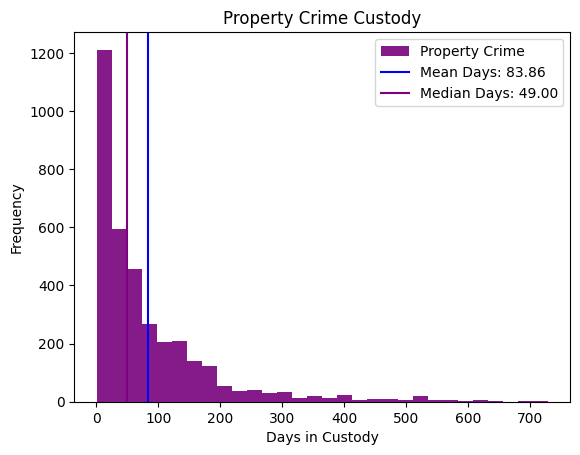

In [71]:
vcdf  = dfwcharge[dfwcharge["Property Crime"] == 1.0]
vcdf = vcdf[vcdf['Days Float'] <=730]
vcdf = vcdf[vcdf['Days Float'] > 0]

vcdays = vcdf["Days Float"]

plt.hist(vcdays, bins=30, color =['#851b88'], label=['Property Crime'])

avdays =vcdays.mean()
mediandays =vcdays.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Property Crime Custody")


Text(0.5, 1.0, 'Public Health Violation Custody')

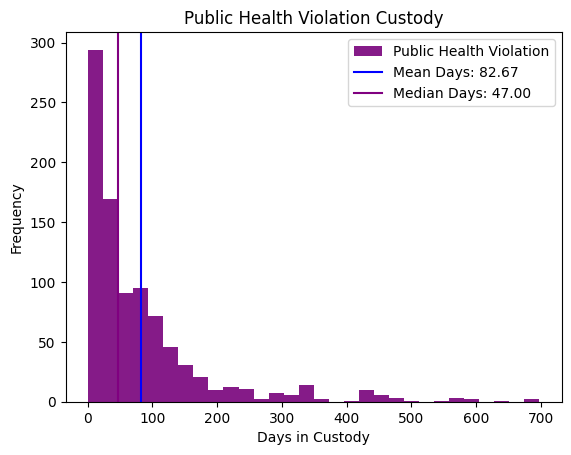

In [72]:
vcdf  = dfwcharge[dfwcharge["Public Health Violation"] == 1.0]
vcdf = vcdf[vcdf['Days Float'] <=730]
vcdf = vcdf[vcdf['Days Float'] > 0]

vcdays = vcdf["Days Float"]

plt.hist(vcdays, bins=30, color =['#851b88'], label=['Public Health Violation'])

avdays =vcdays.mean()
mediandays =vcdays.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Public Health Violation Custody")


Text(0.5, 1.0, 'Possesion of a Firearm or Weapon Custody by Race')

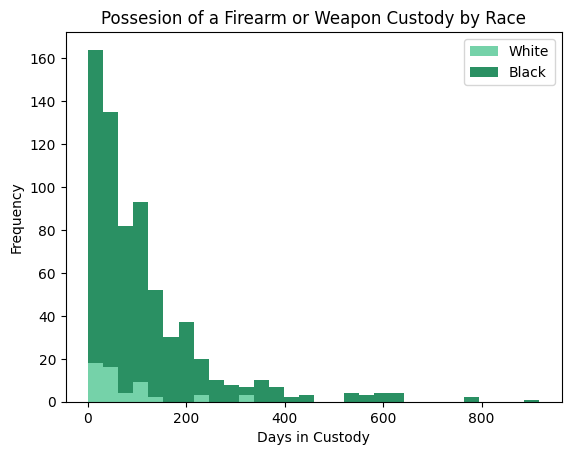

In [73]:
pfire = dfwcharge[dfwcharge["Charge Name"] == "POSS OF A FIREARM OR WEAPON BY FELON"]
pfire = pfire.merge(dfinfocus, on=["Magistrate Number"], how='left')
pfire = pfire.dropna()
pfwhite_days = pfire[pfire["Race"] == "White"]["Days Float_x"]
pfblack_days = pfire[pfire["Race"] == "Black"]["Days Float_x"]

plt.hist([pfwhite_days, pfblack_days], bins=30, color = ['#75d2a9','#2a9063'], stacked=True, label=['White', 'Black'])
plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Possesion of a Firearm or Weapon Custody by Race")

Text(0.5, 1.0, 'Domestic Abuse Battery Custody by Race')

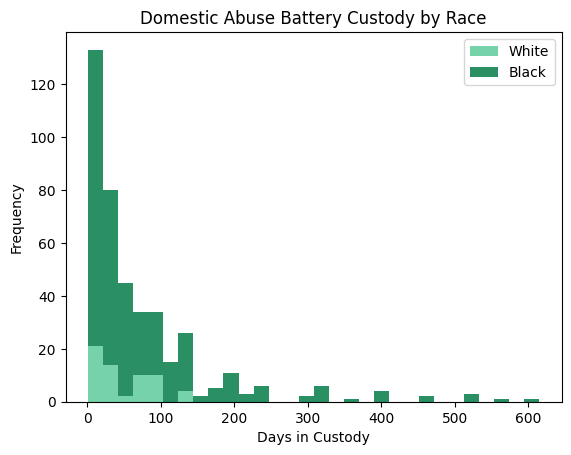

In [74]:
pfire = dfwcharge[dfwcharge["Charge Name"] == "DOMESTIC ABUSE BATTERY"]
pfire = pfire.merge(dfinfocus, on=["Magistrate Number"], how='left')
pfire = pfire.dropna()
pfwhite_days = pfire[pfire["Race"] == "White"]["Days Float_x"]
pfblack_days = pfire[pfire["Race"] == "Black"]["Days Float_x"]

plt.hist([pfwhite_days, pfblack_days], bins=30, color = ['#75d2a9','#2a9063'], stacked=True, label=['White', 'Black'])
plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Domestic Abuse Battery Custody by Race")

##Case Outcomes

In [75]:
def endcheck(s):
  if isinstance(s, str):
    if 'D.A.REFUSED CHARGES' in s:
      return 'DAR'
    elif 'D.A. REFUSED CHARGES' in s:
      return 'DAR'
    elif 'D.A.REFUSED' in s:
      return 'DAR'
    elif 'D.A. REFUSED' in s:
      return 'DAR'
    elif 'D.A. RFUSED' in s:
      return "DAR"
    elif 'CHARGES DROPPED' in s:
      return 'CD'
    elif 'NOT GUILTY' in s:
      return "NOT GUILTY"
    elif "FOUND GUILTY" in s:
      return "SENTENCED"
    elif 'PLED GUILTY' in s:
      return 'PLED GUILTY'
    elif "PLEA AGREEMENT" in s:
      return "PLED GUILTY"
    elif  "PLEA OF GUILTY" in s:
      return "PLED GUILTY"
    elif 'NOLLE PROSEQUI' in s:
      return 'NOLLE PROSEQUI'
    elif "SENTENCE" in s:
      return "SENTENCED"
    elif "SENTENCING" in s:
      return "SENTENCED"
    elif 'DECEASED' in s:
      return 'DEAD'
    elif 'CONTINUED WITHOUT DATE' in s:
        return 'ON GOING'
    elif "RESULT-HELD" in s:
      return "RESULT HELD"
    elif 'THE DEFENDANT HAS PAID ALL FINES AND FEES' in s:
      return "FINES PAID"
    elif "DEFENDANT PAID $" in s:
      return "FINES PAID"
    elif "PAID RESTITUTION IN FULL" in s:
      return "FINES PAID"
    elif "ORDERED DEFENDANT PAY" in s:
      return "FINES ISSUED"
    elif "MOOT" in s:
      if "MOOT REFUSED" not in s:
        return "MOOT"
    elif "EXTRADITION" in s:
      return "EXTRADITION"
    elif "ADMITTED TO ALLEGATIONS" in s:
      return "PLED GUILTY"
    elif "RELEASE OF PROPERTY" in s:
      return "PROPERTY RELEASE"
    elif "RELEASE PROPERTY" in s:
      return "PROPERTY RELEASE"
    elif "CASE TRANSFERRED" in s:
      return "CASE TRANSFERRED"
    elif 'REFUSED' in s:
      return 'REFUSED'
    elif "SET FOR" in s:
      return "ON GOING"
    elif "TRAIL" in s:
      return "ON GOING"
    else:
      return 0
  else:
    return 0

def slendcheck(s):
  if isinstance(s, str):
    if 'D.A.REFUSED CHARGES' in s:
      return 'DAR'
    elif 'D.A. REFUSED CHARGES' in s:
      return 'DAR'
    elif 'D.A.REFUSED' in s:
      return 'DAR'
    elif 'D.A. REFUSED' in s:
      return 'DAR'
    elif 'D.A. RFUSED' in s:
      return "DAR"
    elif 'CHARGES DROPPED' in s:
      return 'CD'
    elif 'PLED NOT GUILTY' in s:
      return "NOT GUILTY"
    elif 'NOT GUILTY' in s:
      return "NOT GUILTY"
    elif "FOUND GUILTY" in s:
      return "SENTENCED"
    elif 'PLED GUILTY' in s:
      return 'PLED GUILTY'
    elif "PLEA AGREEMENT" in s:
      return "PLED GUILTY"
    elif  "PLEA OF GUILTY" in s:
      return "PLED GUILTY"
    elif 'NOLLE PROSEQUI' in s:
      return 'NOLLE PROSEQUI'
    elif "SENTENCE" in s:
      return "SENTENCED"
    elif "SENTENCING" in s:
      return "SENTENCED"
    elif 'DECEASED' in s:
      return 'DEAD'
    elif 'CONTINUED WITHOUT DATE' in s:
        return 'ON GOING'
    elif "RESULT-HELD" in s:
      return "RESULT HELD"
    elif 'THE DEFENDANT HAS PAID ALL FINES AND FEES' in s:
      return "FINES PAID"
    elif "DEFENDANT PAID $" in s:
      return "FINES PAID"
    elif "PAID RESTITUTION IN FULL" in s:
      return "FINES PAID"
    elif "ORDERED DEFENDANT PAY" in s:
      return "FINES ISSUED"
    elif "MOOT" in s:
      if "MOOT REFUSED" not in s:
        return "MOOT"
    elif "EXTRADITION" in s:
      return "EXTRADITION"
    elif "ADMITTED TO ALLEGATIONS" in s:
      return "PLED GUILTY"
    elif "RELEASE OF PROPERTY" in s:
      return "PROPERTY RELEASE"
    elif "RELEASE PROPERTY" in s:
      return "PROPERTY RELEASE"
    elif "CASE TRANSFERRED" in s:
      return "CASE TRANSFERRED"
    elif 'REFUSED' in s:
      return 'REFUSED'
    elif "SET FOR" in s:
      return "ON GOING"
    elif "TRAIL" in s:
      return "ON GOING"
    else:
      return 0
  else:
    return 0

casedf["EndCase"] = casedf['Text'].apply(endcheck)
slcasedf["EndCase2"] = slcasedf["Text"].apply(slendcheck)
tlcasedf["EndCase3"] = tlcasedf["Text"].apply(slendcheck)

In [76]:
slcasedf = slcasedf[["Magistrate Number", "EndCase2"]]
tlcasedf = tlcasedf[["Magistrate Number", "EndCase3"]]
casedf = casedf.merge(slcasedf, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
casedf = casedf.merge(tlcasedf, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
casedf = casedf.fillna(0)

In [77]:
def update_endcase1(casedf):
    casedf["EndCase"] = np.where((casedf["EndCase"] == "ON GOING") & (casedf["EndCase2"] != 0), casedf["EndCase2"], casedf["EndCase"])
    casedf["EndCase"] = np.where((casedf["EndCase"] == "ON GOING") & (casedf["EndCase3"] != 0), casedf["EndCase3"], casedf["EndCase"])
    return casedf
def update_endcase2(casedf1):
    casedf1["EndCase"] = np.where((casedf1["EndCase"] == "MOOT") & (casedf1["EndCase2"] != 0), casedf1["EndCase2"], casedf1["EndCase"])
    casedf1["EndCase"] = np.where((casedf1["EndCase"] == "MOOT") & (casedf1["EndCase3"] != 0), casedf1["EndCase3"], casedf1["EndCase"])
    return casedf1
def update_endcase3(casedf):
    casedf["EndCase"] = np.where(casedf["EndCase"] == 0, casedf["EndCase2"], casedf["EndCase"])
    casedf["EndCase"] = np.where(casedf["EndCase"] == 0, casedf["EndCase3"], casedf["EndCase"])
    return casedf

updated_casedf = update_endcase1(casedf)
updated_casedf1 = update_endcase2(updated_casedf)
update_casedf = update_endcase3(updated_casedf1)


In [78]:
update_casedf["EndCase"].value_counts()

,count
EndCase,
DAR,8981
ON GOING,5085
PLED GUILTY,3305
NOLLE PROSEQUI,2697
REFUSED,1398
0,928
SENTENCED,561
RESULT HELD,444
MOOT,292


In [79]:
update_casedf["EndCase"] = update_casedf["EndCase"].replace({
    'DAR': 'DA Refused',
    'ON GOING': 'ONGOING',
     0: 'Unknown'
})

In [80]:
num = update_casedf['EndCase'].value_counts().nlargest(8).reset_index()
num.columns = ['EndCase', 'count']
custom_colors = ['#338987', '#3e5d8d', '#6294e0', '#2a9063']
fig = px.pie(num,
             values='count',
             names='EndCase',
             title = 'Case Outcomes',
             color_discrete_sequence=custom_colors)

fig.update_traces(
    textinfo='label+percent',
    textposition='outside',
    pull=[0.1] * len(num)
)

fig.update_layout(
    showlegend=False,
    margin=dict(t=50, b=50)
)

fig.show()

In [81]:
pg = update_casedf[update_casedf['EndCase'] == "PLED GUILTY"]
pg = pg.merge(dfinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
custom_colors = ['#88348b', '#b895dd']

num = pg["Sex"].value_counts().nlargest(8).reset_index()
num.columns = ['Sex', 'count']
fig = px.pie(num,
             values='count',
             names='Sex',
             title = 'Pled Guilty by Sex',
             color_discrete_sequence=custom_colors)

fig.update_traces(textinfo='percent+label', textposition='inside')
fig.update_layout(showlegend=False)

fig.show()

In [82]:
pg = update_casedf[update_casedf['EndCase'] == "PLED GUILTY"]
pg = pg.merge(dfinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
custom_colors = ['#377e53', '#5fcf8b', '#a2f2c2', '#d8ffe7', '#d2f2de', '#fbfffd']
num = pg["Race"].value_counts().nlargest(8).reset_index()
num.columns = ['Race', 'count']
fig = px.pie(num,
             values='count',
             names='Race',
             title = 'Pled Guilty by Race',
             color_discrete_sequence=custom_colors)

fig.update_traces(textinfo='percent+label', textposition='inside')
fig.update_layout(showlegend=False)

fig.show()

In [83]:
pg['Category'] = np.where((pg["Race"] == "Black") & (pg["Sex"] == "Male"),
                                "Black Male", "Other")
pg = pg.dropna()
custom_colors = ['#3e5d8d', '#6294e0']

category_counts = pg["Category"].value_counts().reset_index()
category_counts.columns = ['Category', 'count']

fig = px.pie(category_counts,
             values='count',
             names='Category',
             title='Pled Guilty Black Male Defendants vs. Others',
             color_discrete_sequence=custom_colors)
fig.show()

In [84]:
chargedropped = update_casedf[(update_casedf["EndCase"] == "REFUSED") | (update_casedf["EndCase"] == "DAR")| (update_casedf["EndCase"] == "CD")| (update_casedf["EndCase"] == "NOLLE PROSEQUI")]
cdpie = chargedropped.merge(dfinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
custom_colors = ['#88348b', '#b895dd']

num = cdpie["Sex"].value_counts().reset_index()
num.columns = ['Sex', 'count']
fig = px.pie(num,
             values='count',
             names='Sex',
             title = 'Charges Dropped by Sex',
             color_discrete_sequence=custom_colors)

fig.update_traces(textinfo='percent+label', textposition='inside')
fig.update_layout(showlegend=False)

fig.show()

In [85]:
cdpie['Category'] = np.where((cdpie["Race"] == "Black") & (cdpie["Sex"] == "Male"),
                                "Black Male", "Other")
custom_colors = ['#6294e0', '#3e5d8d']

category_counts = cdpie["Category"].value_counts().reset_index()
category_counts.columns = ['Category', 'count']

fig = px.pie(category_counts,
             values='count',
             names='Category',
             title='Charges Dropped Black Male Defendants vs. Others',
             color_discrete_sequence=custom_colors)
fig.show()

In [86]:
chargedropped = update_casedf[(update_casedf["EndCase"] == "REFUSED") | (update_casedf["EndCase"] == "DAR")| (update_casedf["EndCase"] == "CD")| (update_casedf["EndCase"] == "NOLLE PROSEQUI")]
cdpie = chargedropped.merge(dfinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
custom_colors = ['#377e53', '#5fcf8b', '#a2f2c2', '#d8ffe7', '#d2f2de', '#fbfffd']

num = cdpie["Race"].value_counts().nlargest(8).reset_index()
num.columns = ['Race', 'count']
fig = px.pie(num,
             values='count',
             names='Race',
             title = 'Charges Dropped by Race',
             color_discrete_sequence=custom_colors)

fig.update_traces(textinfo='percent+label', textposition='inside')
fig.update_layout(showlegend=False)

fig.show()

In [105]:
preddf = update_casedf
preddf = preddf[["Magistrate Number", "EndCase"]]
cusinfopred = cusinfopred1
cusinfopred["Custody"] = cusinfopred1["Days Float"].apply(lambda x: 1 if x > 0 else 0)
cusinfopred = cusinfopred[["Magistrate Number", "Custody"]]
cusinfopred = cusinfopred.groupby('Magistrate Number', as_index=False)['Custody'].max()
preddf = preddf.merge(cusinfopred,left_on="Magistrate Number", right_on="Magistrate Number", how='left')
preddf["Custody"] = preddf["Custody"].fillna(0)
dfinfopred = dfinfo[["Magistrate Number","Sex", "Race", "Birth Year"]]
dfinfopred = dfinfopred.dropna()
current_year = datetime.now().year
dfinfopred["Age"] = current_year - dfinfopred["Birth Year"]
dfinfopred = dfinfopred[["Magistrate Number","Sex", "Race", "Age"]]
preddf = preddf.merge(dfinfopred,left_on="Magistrate Number", right_on="Magistrate Number", how='inner')
preddf = preddf.drop_duplicates(subset=['Magistrate Number'], keep='last')

In [106]:
pg = update_casedf[update_casedf['EndCase'] == "PLED GUILTY"]
numpg = len(pg)
pg = pg.merge(cusinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
pg = pg.fillna(0)
c = len(pg[pg["Custody"] == 1])
percus = (c/numpg)*100
print(str(numpg) + " cases pled guilty; of these, " + str(c) + " were in custody at " + str(percus) + "%")

3305 cases pled guilty; of these, 2195 were in custody at 66.41452344931922%


In [107]:
notpg = update_casedf[update_casedf['EndCase'] != "PLED GUILTY"]
notpg = notpg.merge(cusinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
notpg = notpg.fillna(0)
numpg = len(notpg)
c = len(notpg[notpg["Custody"] == 1])
percus = (c/numpg)*100
print(str(numpg) + " cases did not plead guilty; of these, " + str(c) + " were in custody at " + str(percus) + "%")


22824 cases did not plead guilty; of these, 5198 were in custody at 22.774272695408342%


In [108]:
chargedropped = update_casedf[(update_casedf["EndCase"] == "REFUSED") | (update_casedf["EndCase"] == "DAR")| (update_casedf["EndCase"] == "NOLLE PROSEQUI")]
cdpie = chargedropped.merge(dfinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
numcd = len(cdpie)
cdpie = cdpie.merge(cusinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
cdpie = cdpie.fillna(0)
cuscd = len(cdpie[cdpie["Custody"] == 1])
percus = (cuscd/numcd)*100

print(str(numcd) + " cases had charges dropped; of these, " + str(cuscd) + " were in custody at " + str(percus) + "%")

4221 cases had charges dropped; of these, 1032 were in custody at 24.449182658137882%


In [109]:
nchargedropped = update_casedf[
    (update_casedf["EndCase"] != "REFUSED") &
    (update_casedf["EndCase"] != "DAR") &
    (update_casedf["EndCase"] != "NOLLE PROSEQUI")
]
ncd = nchargedropped.merge(dfinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
numcd = len(ncd)
ncd = ncd.merge(cusinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
ncd = ncd.fillna(0)
cuscd = len(ncd[ncd["Custody"] == 1])
percus = (cuscd/numcd)*100
print(str(numcd) + " cases did not have charges dropped; of these, " + str(cuscd) + " were in custody at " + str(percus) + "%")

20750 cases did not have charges dropped; of these, 6688 were in custody at 32.23132530120482%


In [110]:
chargedropped = update_casedf[(update_casedf["EndCase"] == "DAR")| (update_casedf["EndCase"] == "NOLLE PROSEQUI")]
cusdrop2 = cusinfo[cusinfo["Days Float"] > 0]
cusdrop = chargedropped.merge(cusdrop2, left_on="Magistrate Number", right_on="Magistrate Number", how='inner')
print(cusdrop["Days Float"].mean())
print(cusdrop["Days Float"].median())

54.073982737361284
26.0


In [111]:
preddf["Sex"] = preddf["Sex"].replace({'Female': 0, 'Male': 1}).infer_objects(copy=False)
preddf = pd.get_dummies(preddf, columns=["Race"], prefix="Race", drop_first=True)
preddf = preddf[(preddf["EndCase"] == "DAR")|
                   (preddf["EndCase"] == "PLED GUILTY" )
                   |(preddf["EndCase"] == "NOLLE PROSEQUI") |
                  (preddf["EndCase"] == "REFUSED")  ]
endcase_mapping = {
    'DAR': 0,
    'NOLLE PROSEQUI': 0,
    'REFUSED': 0,
    'PLED GUILTY': 1}
preddf["EndCase"] = preddf["EndCase"].replace(endcase_mapping).infer_objects(copy=False)
preddf = preddf.astype(int)

In [112]:
chargepred = dfcharge
chargepred = chargepred[['Magistrate Number', "Violent Crime", "Domestic Violence", "Child Abuse","Property Crime", "Substance Use", "Sex Offense", "Public Health Violation"]]
chargepred = chargepred.fillna(0)
chargepred = chargepred.drop_duplicates(subset=['Magistrate Number'], keep='first')
preddf = preddf.merge(chargepred, left_on="Magistrate Number", right_on="Magistrate Number", how='inner')
dfcourtcor = dfcourt[["Magistrate Number", "ROR", "Stay Away Order"]]
preddf = preddf.merge(dfcourtcor, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
preddf = preddf.drop_duplicates(subset=['Magistrate Number'], keep='last')

In [113]:
magpred = dataframe[["Magistrate Number", "Section"]]
magpred = magpred.dropna()
magistrate_arrays = {}
sections = ["M1", "M2", "M3", "M4", "M5"]
for magistrate, group in magpred.groupby("Magistrate Number"):
    section_array = [0] * 5
    for section in group["Section"]:
        index = sections.index(section)
        section_array[index] = 1
    magistrate_arrays[magistrate] = section_array
magistrate_df = pd.DataFrame.from_dict(magistrate_arrays, orient='index', columns=sections)
magistrate_df.reset_index(inplace=True)
magistrate_df.rename(columns={"index": "Magistrate Number"}, inplace=True)
preddf = preddf.merge(magistrate_df, left_on="Magistrate Number", right_on="Magistrate Number", how='inner')

In [114]:
predDAR = preddf[preddf["EndCase"] == 0]
shufDAR = predDAR.sample(frac=1).reset_index(drop=True)
shufpredDAR = shufDAR.head(3000)
predPG = preddf[preddf["EndCase"] == 1]
shufPG = predPG.sample(frac=1).reset_index(drop=True)
shufpredPG = shufPG.head(2000)
predictiondf = pd.concat([shufpredDAR,
                          shufpredPG])
predictiondf = predictiondf.sample(frac=1).reset_index(drop=True)

In [115]:
preddataknn = predictiondf[["Custody", "Sex", "Race_Black",
                          "Race_Hispanic",	"Race_Indigenous",	"Race_Unknown",	"Race_White", "Age",
                         "Violent Crime", "Domestic Violence", "Child Abuse","Property Crime",
                         "Substance Use", "Sex Offense", "Public Health Violation",
                         "ROR", "Stay Away Order",
                         "M1", "M2", "M3", "M4", "M5"]]
predtargetknn =  predictiondf[["EndCase"]]
X_train, X_test, y_train, y_test = train_test_split(preddataknn, predtargetknn, random_state = 0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
knn = KNeighborsClassifier(n_neighbors = 7)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
accuracy = accuracy_score(y_test, knn_predictions)
precision = precision_score(y_test, knn_predictions, average='weighted')
recall = recall_score(y_test, knn_predictions, average='weighted')
f1 = f1_score(y_test, knn_predictions, average='weighted')

print(f"Average cross-validation score: {np.mean(cv_scores):.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Average cross-validation score: 0.600
Accuracy: 0.617
Precision: 0.610
Recall: 0.617
F1 Score: 0.606


In [116]:
preddata = predictiondf[["Sex", "Race_Black",
                          "Race_Hispanic",	"Race_Indigenous",	"Race_Unknown",	"Race_White", "Age",
                         "Violent Crime", "Domestic Violence", "Child Abuse","Property Crime",
                         "Substance Use", "Sex Offense", "Public Health Violation",
                         "ROR", "Stay Away Order",
                         "M1", "M2", "M3", "M4", "M5"]]
predtarget =  predictiondf[["EndCase"]]
X_train, X_test, y_train, y_test = train_test_split(preddata, predtarget, random_state = 0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
knn = KNeighborsClassifier(n_neighbors = 7)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
accuracy = accuracy_score(y_test, knn_predictions)
precision = precision_score(y_test, knn_predictions, average='weighted')
recall = recall_score(y_test, knn_predictions, average='weighted')
f1 = f1_score(y_test, knn_predictions, average='weighted')

print(f"Average cross-validation score: {np.mean(cv_scores):.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Average cross-validation score: 0.561
Accuracy: 0.568
Precision: 0.560
Recall: 0.568
F1 Score: 0.561


In [117]:
preddataforest = predictiondf[["Custody","Sex", "Race_Black",
                          "Race_Hispanic",	"Race_Indigenous",	"Race_Unknown",	"Race_White", "Age",
                         "Violent Crime", "Domestic Violence", "Child Abuse","Property Crime",
                         "Substance Use", "Sex Offense", "Public Health Violation",
                         "ROR", "Stay Away Order",
                         "M1", "M2", "M3", "M4", "M5"]]
predtargetforest =  predictiondf[["EndCase"]]

X_train, X_test, y_train, y_test = train_test_split(preddataforest, predtargetforest, random_state=0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

rf = RandomForestClassifier(n_estimators=100, random_state=0)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)  # 5-fold cross-validation
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

cm = confusion_matrix(y_test, rf_predictions)
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, average='weighted')
recall = recall_score(y_test, rf_predictions, average='weighted')
f1 = f1_score(y_test, rf_predictions, average='weighted')

print(f"Average cross-validation score: {np.mean(cv_scores):.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Average cross-validation score: 0.621
Accuracy: 0.622
Precision: 0.617
Recall: 0.622
F1 Score: 0.618


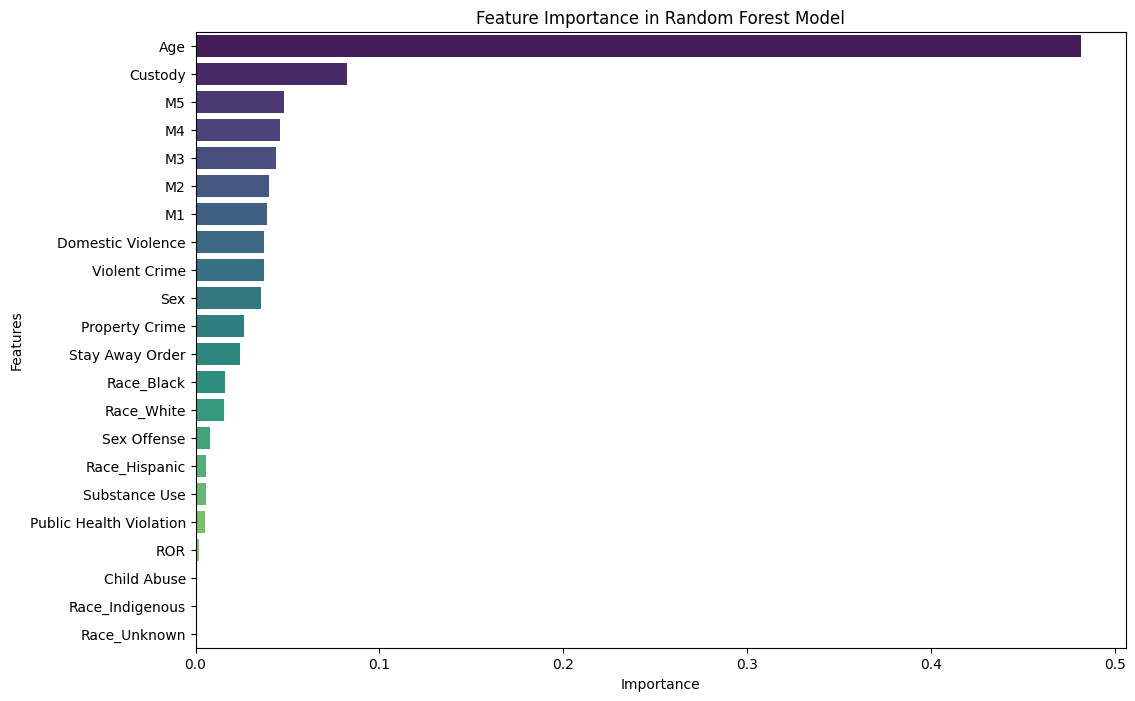

In [118]:
feature_importances = rf.feature_importances_
features = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [119]:
preddata = predictiondf[["Sex", "Race_Black",
                          "Race_Hispanic",	"Race_Indigenous",	"Race_Unknown",	"Race_White", "Age",
                         "Violent Crime", "Domestic Violence", "Child Abuse","Property Crime",
                         "Substance Use", "Sex Offense", "Public Health Violation",
                         "ROR", "Stay Away Order",
                         "M1", "M2", "M3", "M4", "M5"]]
predtarget =  predictiondf[["EndCase"]]

X_train, X_test, y_train, y_test = train_test_split(preddata, predtarget, random_state=0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

rf = RandomForestClassifier(n_estimators=100, random_state=0)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)  # 5-fold cross-validation
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

cm = confusion_matrix(y_test, rf_predictions)
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, average='weighted')
recall = recall_score(y_test, rf_predictions, average='weighted')
f1 = f1_score(y_test, rf_predictions, average='weighted')

print(f"Average cross-validation score: {np.mean(cv_scores):.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Average cross-validation score: 0.589
Accuracy: 0.591
Precision: 0.584
Recall: 0.591
F1 Score: 0.584


In [103]:
Proceeding['Has701'] = Proceeding['Has701'].map({True: 1, False: 0})
pval_df = Proceeding.groupby('Magistrate Number', as_index=False).agg({
    'Has701': 'max',
})

In [104]:
dfinfo = dfinfo.dropna()
pval_df = pval_df[["Magistrate Number", "Has701"]]
pval_df = pval_df.merge(dfinfo701, left_on="Magistrate Number", right_on="Magistrate Number", how='inner')
sevdf = pval_df[pval_df.Has701 == True]
black_count = len(pval_df[pval_df.Race == "Black" ])
white_count = len(pval_df[pval_df.Race == "White"])
black_countsev = len(sevdf[sevdf.Race == "Black"])
white_countsev = len(sevdf[sevdf.Race == "White"])
black_count_no701 = black_count - black_countsev
white_count_no701 = white_count - white_countsev
table = [[black_countsev, black_count_no701],
         [white_countsev, white_count_no701]]
sev_given_b = (black_countsev/black_count * 100)
sev_given_w = (white_countsev/ white_count * 100)
res = fisher_exact(table, alternative="less")

print(f"Given Black: Probability of 701 release = {sev_given_b:.2f}%")
print(f"Given White: Probability of 701 release = {sev_given_w:.2f}%")
print(f"\nP-value of significance: {res.pvalue:.3f}")


Given Black: Probability of 701 release = 7.82%
Given White: Probability of 701 release = 8.42%

P-value of significance: 0.114


In [120]:
ogdf = update_casedf[update_casedf["EndCase"] == "NOLLE PROSEQUI"]
ogdf1 = ogdf.merge(cusinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
ogdf1 = ogdf1.fillna(0)
cusog = ogdf1[ogdf1["Custody"] == 1.0]
lenog = len(ogdf1)
lencog = len(cusog)
print("Out of " + str(lenog) + " cases that were identified as Nolle Prosequi,")
print(str(lencog) + " spent time in custody")
perog = (lencog/lenog) *100
print(f"at {perog:.2f}%")

Out of 2931 cases that were identified as Nolle Prosequi,
811 spent time in custody
at 27.67%


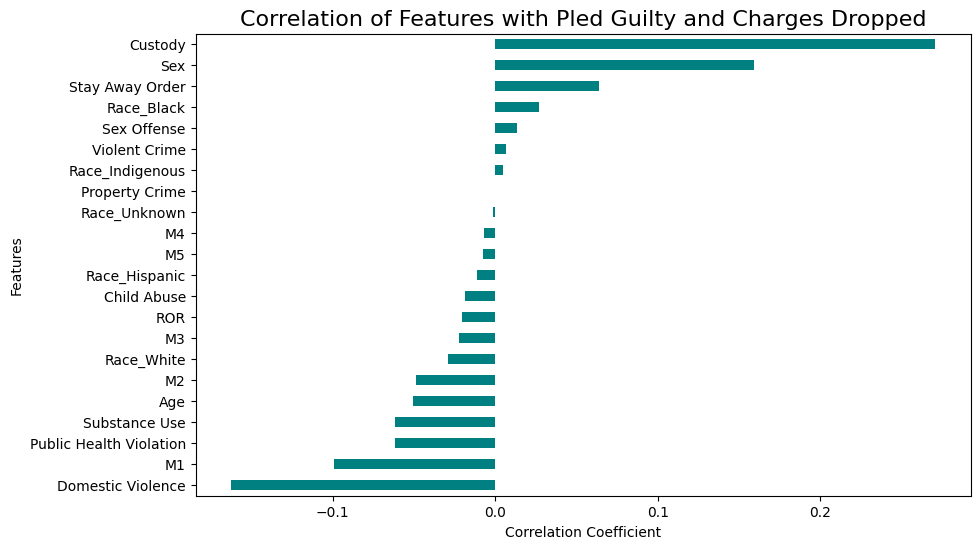

In [121]:
corrdf = pd.concat([predtargetknn, preddataknn], axis=1)
correlation_matrix = corrdf.corr()
endcase_correlation = correlation_matrix['EndCase']
endcase_correlation
endcase_correlation = endcase_correlation.drop('EndCase')

plt.figure(figsize=(10, 6))
endcase_correlation.sort_values().plot(kind='barh', color='teal')
plt.title("Correlation of Features with Pled Guilty and Charges Dropped", fontsize=16)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

MANUAL CHECK
if FTA is result of a court date at the same time

In [123]:
def FTACheck(s):
  if(s == 0):
    return 0
  elif ('IN CUSTODY') in s:
    return 0
  elif ('IS HELD IN') in s:
    return 0
  elif ('TRANSPORTED') in s:
    return 0
  elif ("FEDERAL CUSTODY") in s:
    return 0
  elif ("TRANSPORTED TO COURT") in s:
    return 1
  elif ("JAIL LIST") in s:
    return 0
  elif("SHE IS TO BE RELEASED") in s:
    return 0
  elif("HE IS TO BE RELEASED") in s:
    return 0
  elif("FILED ARREST ON CAPIAS") in s:
    return 0
  elif("ARRESTED") in s:
    return 0
  elif ("CAPIAS ISSUED") in s:
    return 0
  elif("ALIAS CAPIAS REMAINS") in s:
    return 0
  elif ("RELEASE ISSUED") in s:
    return 0
  elif ('FAILED TO APPEAR') in s:
    return 1
  elif("DID NOT APPEAR") in s:
    return 1
  elif("POSTED BOND") in s:
    return 0
  elif("POSTED BAIL") in s:
    return 0
  elif("HOUSE ARREST") in s:
    return 0
  elif("SURETY") in s:
    return 0
  elif("STAY AWAY ORDER") in s:
    return 0
  else:
    return 0
dfcourt['FTA1'] = dfcourt['CDCText'].apply(FTACheck)
dfcourt['FTA2'] = dfcourt['ProText'].apply(FTACheck)
dfcourt["FTA"] = dfcourt["FTA1"] + dfcourt["FTA2"]
dfcourt = dfcourt.drop(columns=["FTA1", "FTA2"])

In [124]:
ftadf = dfcourt
print(len(ftadf))
dfinfofta = dfinfo.drop_duplicates(subset = "Magistrate Number")
dfinfofta = dfinfofta[["Magistrate Number", "Name"]]
ftadf = ftadf.merge(dfinfofta, on = ["Magistrate Number"], how = 'left')
ftadf = ftadf.dropna()
print(len(ftadf["Name"].unique()))
def check_defendant_overlap(ftadf):
  for i in range(len(ftadf)):
    review_rows = []
    if ftadf.FTA.iloc[i] == 1:
      defendant_name = ftadf["Name"].iloc[i]
      fta_date = ftadf["Proceeding Date"].iloc[i]

      overlaps = ftadf[
                    (ftadf["Name"] == defendant_name) &
                    (ftadf["Proceeding Date"] == fta_date) &
                    (ftadf.index != i)
                ]
      if not overlaps.empty:
                  review_rows.append({
                      "FTA_Row": ftadf.iloc[i].to_dict(),
                      "Overlapping_Rows": overlaps.to_dict(orient="records")
                  })

  return review_rows

283052
5007


In [125]:
dfinfofta = dfinfofta.sort_values(by=['Name'], ascending = [True])
dfinfofta = dfinfofta[dfinfofta['Name'].duplicated(keep=False)]
ftadf = dfcourt
ftadf = ftadf.merge(dfinfofta, on = ["Magistrate Number"], how = 'inner')
ftadf = ftadf[["Magistrate Number", "Proceeding Date", "ProText", "CDCText", "FTA", "Name", "Custody"]]
ftadf
ftadf1 = ftadf[ftadf["FTA"] == 1]
ftadf0 = ftadf[ftadf["FTA"] == 0]
def find_matching_proceedings(ftadf1, ftadf0):
    matches = []
    for i, row1 in ftadf1.iterrows():
        name = row1["Name"]
        proceeding_date = row1["Proceeding Date"]
        matching_rows = ftadf0[(ftadf0["Name"] == name) & (ftadf0["Proceeding Date"] == proceeding_date)]
        if not matching_rows.empty:
            matches.append({
                "FTA_Row": row1.to_dict(),
                "Matching_Rows": matching_rows.to_dict(orient="records")
            })

    return matches

mathes = find_matching_proceedings(ftadf1, ftadf0)

In [126]:
fta_row_df = pd.DataFrame([mathes[1]['FTA_Row']])
matching_rows_df = pd.DataFrame(mathes[1]['Matching_Rows'])

for i in range(len(mathes)):
  if i == 1:
    fta_row_df = pd.DataFrame([mathes[i]['FTA_Row']])
    matching_rows_df = pd.DataFrame(mathes[i]['Matching_Rows'])
  else:
    fta_row_df1 = pd.DataFrame([mathes[i]['FTA_Row']])
    matching_rows_df1 = pd.DataFrame(mathes[i]['Matching_Rows'])
    fta_row_df = pd.concat([fta_row_df,fta_row_df1], ignore_index=True)
    matching_rows_df = pd.concat([matching_rows_df,matching_rows_df1], ignore_index=True)

In [127]:
ftamatch = matching_rows_df = pd.concat([matching_rows_df,fta_row_df], ignore_index=True)

In [128]:
ftamatch = ftamatch.sort_values(by=['Name'], ascending = [True])
ftamatch = ftamatch.drop_duplicates(subset=["Magistrate Number", "ProText", "CDCText"])
ftamatchtest = ftamatch[ftamatch.Name == "CJA"]
#EX: NAMES CJA, AA, SJL, WTM, MJJ, SD, DJS
ftamatchtest = ftamatchtest.sort_values(by=['Proceeding Date'], ascending = [True])

for i in range(len(ftamatchtest)):
  print(ftamatchtest.iloc[i]["Proceeding Date"])
  print(ftamatchtest.iloc[i]["FTA"])
  print(ftamatchtest.iloc[i]["Magistrate Number"])
  if(ftamatchtest.iloc[i]["ProText"] != 0):
    print(ftamatchtest.iloc[i]["ProText"])
  else: print(ftamatchtest.iloc[i]["CDCText"])

2019-03-12 00:00:00
1
577633
 >DEFENDANT, JASON A COMSTOCK DID NOT APPEAR FOR UNSCHEDULED JUDICIAL ACTIVITY >HEARING ON MOTIONS SET FOR 04/10/19 >SEND NOTICES. >NOTIFY DEF.COUNSEL. >PDOJL 
2019-03-12 00:00:00
0
577783
 RULE TO SHOW CAUSE IN MAGISTRATE COURT SECTION M3 RESULT-HELD AS OF THIS DATE THE STATE HAS NO DISPOSITION IN THIS MATTER 
2021-07-19 00:00:00
0
592683
 STATUS HEARING IN MAGISTRATE COURT SECTION M1 RESULT-CAPIAS ISSUED THE COURT GRANTED STATE'S MOTION FOR SPECIAL PROCESS SERVER DEFENDANT WAS ISSUED AN INSTANTER AT CARMEN STREET ADDRESS THE COURT ISSUED AN ALIAS CAPIS IN THE AMOUNT OF $20,000.00 
2021-07-19 00:00:00
1
588712
 >THE DEFENDANT, JASON A COMSTOCK FAILED TO APPEAR FOR ARRAIGNMENT SHERIFF'S RETURN INDICATES THAT RETURN HAS BEEN LEFT IN DOOR. >ALIAS CAPIAS WITH NO BOND. >CONTINUED WITHOUT DATE. 
